# Python Data Visualization for Time Series Data

Time series data is a fundamental data type in various industries, and as a budding data scientist, it's crucial to grasp how to work with it and apply analytical and forecasting techniques. In this article series, we will cover the essential techniques for handling time series data in Python, starting from data manipulation, analysis, and visualization to gain insights and prepare it for statistical, machine learning, and deep learning-based forecasting and classification methods. This practical guide will provide step-by-step explanations and demonstrations using real-world data.


Table of Contents:
1. Line Plots: Visualizing Time Series Data
2. Summary Statistics and Diagnostics: Understanding Time Series Patterns
3. Seasonality, Trend, and Noise: Identifying Time Series Components
4. Visualizing Multiple Time Series: Comparing and Contrasting Time Series Data
5. Case Study: Unemployment Rate Analysis: Applying Time Series Techniques to Real Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# 1. Line Plots: Visualizing Time Series Data
In this segment, we will delve into the world of data visualization using Python's basic plotting tools. We will explore how to create informative and visually appealing time series plots, along with techniques for annotating and customizing them to suit your specific needs. Get ready to unlock the power of visualizing time series data in Python like never before!



## 1.1. Create time series line plots 
To start off, we will load the discoveries dataset into our Python environment and set the date column as the index using the .read_csv method. Next, we will leverage the .plot method to create visualizations of the data, as illustrated in the code snippet below:

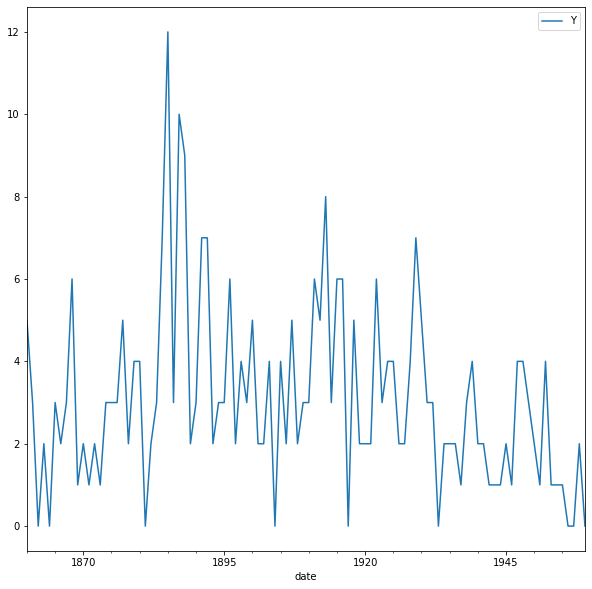

In [2]:
df = pd.read_csv('discoveries.csv', parse_dates=['date'], index_col='date')
df.plot(figsize=(10,10))
plt.show()

The default style for the matplotlib plot may not necessarily be your preferred style, but it is possible to change that. Because it would be time-consuming to customize each plot or to create your own template, several matplotlib style templates have been made available to use. These can be invoked by using the **plt.style** command, and will automatically add pre-specified defaults for fonts, lines, points, background colors, etc… to your plots. In this case, we opted to use the famous **fivethirtyeight** style sheet. To set this style you can use the code below:

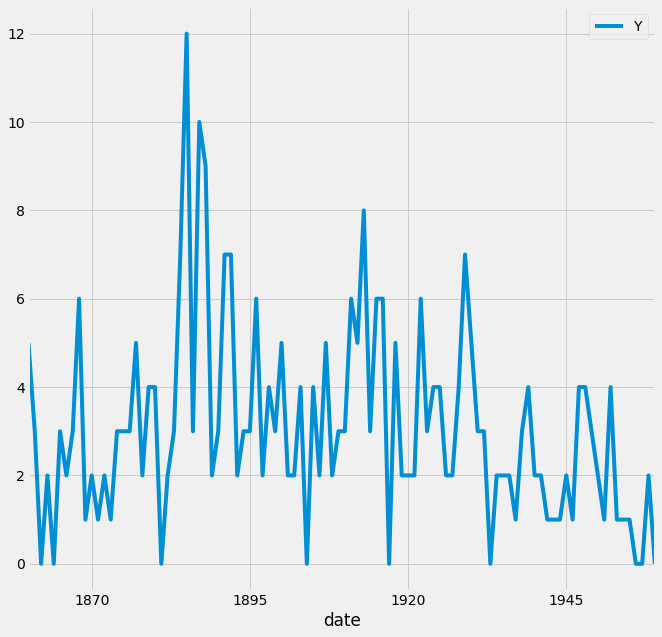

In [6]:
plt.style.use('fivethirtyeight')
df.plot(figsize=(10,10))
plt.show()

To see all of the available styles, use the following code:

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


You can also change the color of the plot using the color parameter as shown in the code below:



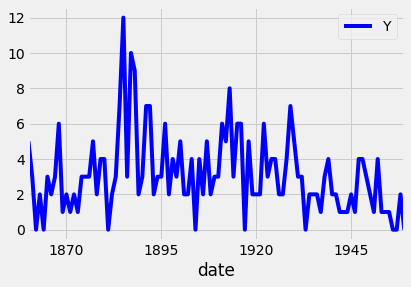

In [8]:
ax = df.plot(color='blue')

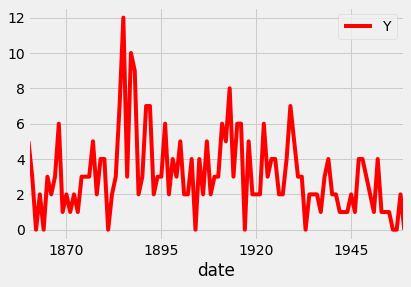

In [9]:
ax = df.plot(color='red')

To ensure that your plots effectively convey the intended message and pertinent information, proper annotation is key. When using the .plot() method in pandas, it returns a matplotlib AxesSubplot object, which can be assigned to a variable, typically named 'ax'. This provides you with the flexibility to add additional notations and customizations to your plot, such as axis labels and titles. You can utilize the .set_xlabel(), .set_ylabel(), and .set_title() methods to specify the labels for the x and y-axes, as well as the title for your plot. This way, you can craft plots that tell a compelling story and effectively communicate the relevant data.

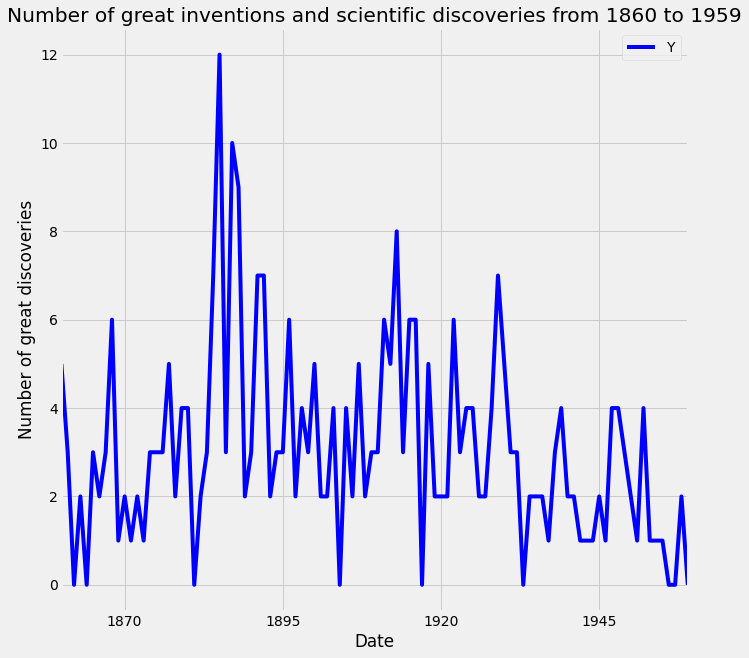

In [10]:
ax = df.plot(color='blue', figsize=(10,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959')
plt.show()

## 1.2. Customize your time series plot
Plots are an effective means to visually comprehend data, but there are instances when you may want to emphasize specific events or guide the user's thought process. To achieve this, you can use pandas DataFrame's date index to slice the data and create a subset that corresponds to a particular time period of interest. Here's an example that illustrates this approach:

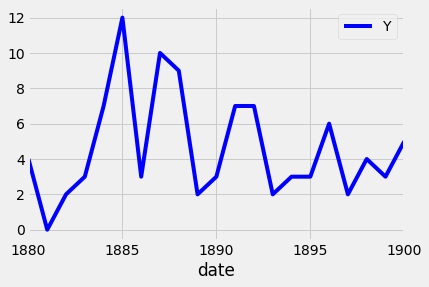

In [17]:
df_subset = df['1880':'1900']
ax = df_subset.plot(color='blue', fontsize=14)
plt.show()

Additional annotations can also help emphasize specific observations or events in your time series. This can be achieved with matplotlib by using the axvline and axvhline methods. This is shown in the example below in which vertical and horizontal lines are drawn using axvline and axvhline methods.



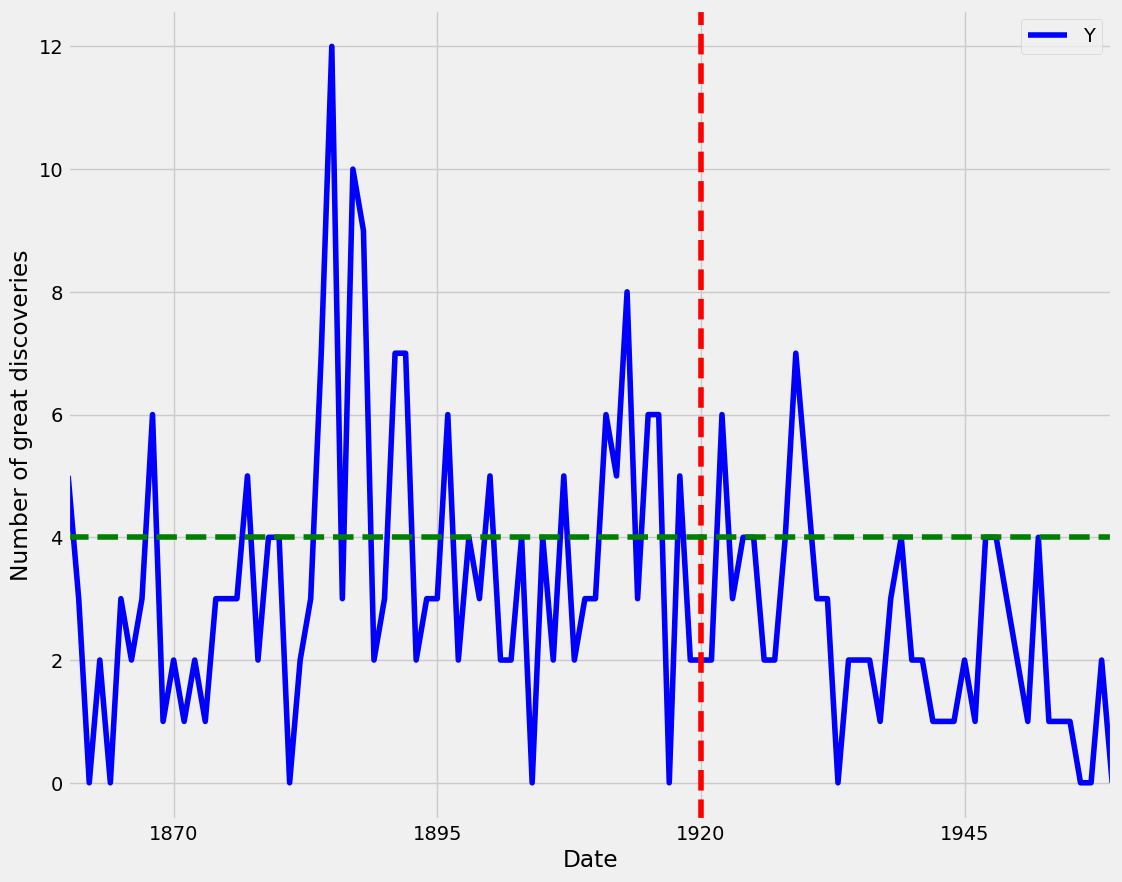

In [9]:
# adding markers
ax = df.plot(color='blue', figsize=(12,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.axvline('1920-01-01', color='red', linestyle='--')
ax.axhline(4, color='green', linestyle='--')

Beyond annotations, you can also highlight regions of interest to your time series plot. This can help provide more context around your data and really emphasize the story you are trying to convey with your graphs. In order to add a shaded section to a specific region of your plot, you can use the axvspan and axhspan methods in matplolib to produce vertical regions and horizontal regions, respectively. An example of this is shown in the code below:



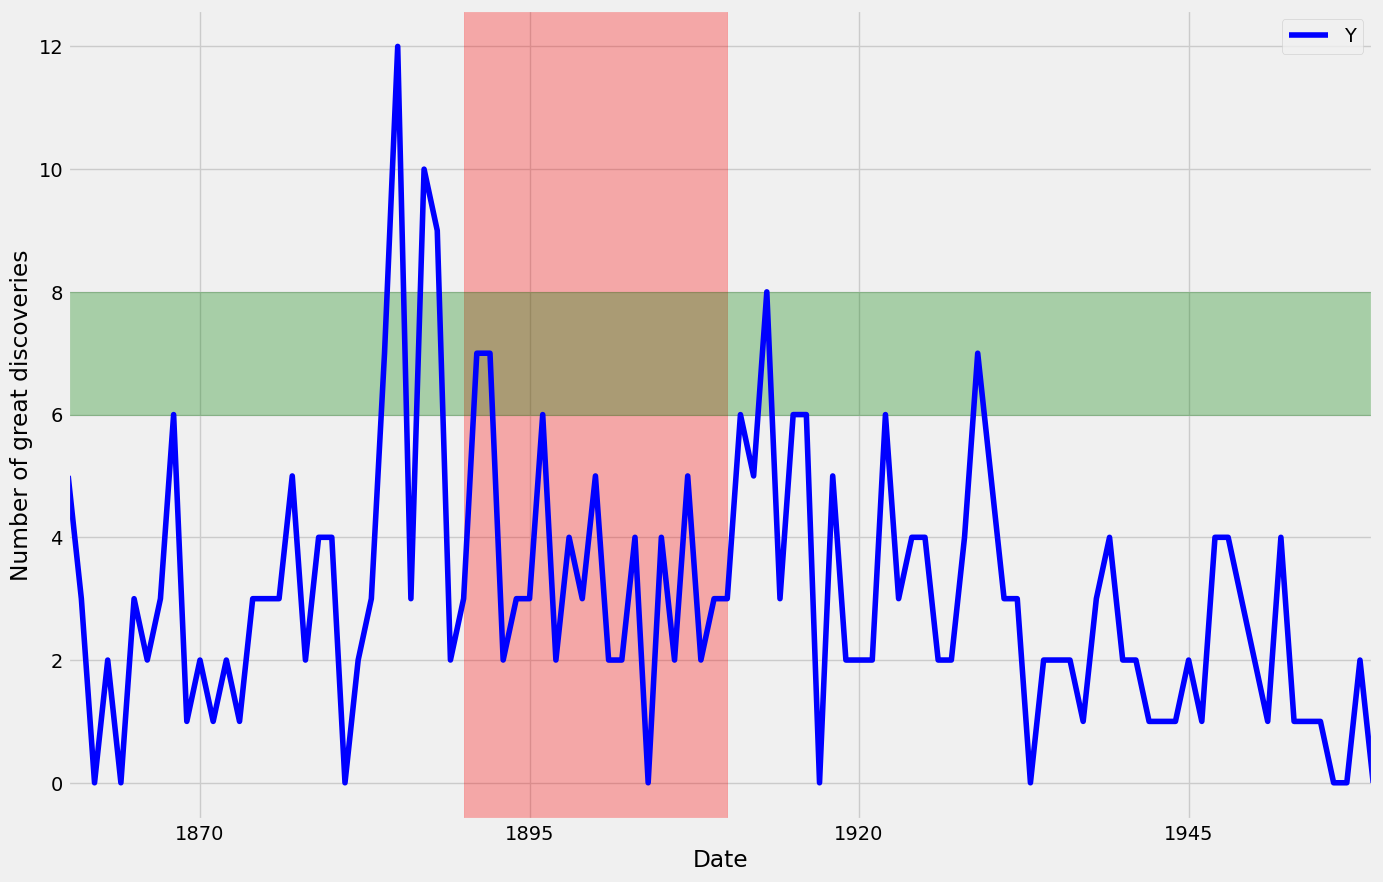

In [10]:
# Highlighting regions of interest
ax = df.plot(color='blue', figsize=(15,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.axvspan('1890-01-01', '1910-01-01', color='red', alpha=0.3)
ax.axhspan(8, 6, color='green', alpha=0.3)

# 2. Unveiling Insights with Summary Statistics and Diagnostics
Explore the intricacies of your time-series data through the computation of summary statistics and the creation of aggregated visualizations in this section.

We will be utilizing a renowned time series dataset, which is widely recognized in the time series community. This dataset comprises the CO2 measurements captured at the Mauna Loa Observatory in Hawaii from 1958 to 2001. 

## 2.1. Clean Your Time Series Data

In real-life scenarios, data can often come in messy and/or noisy formats. “Noise” in data can include things such as outliers, misformatted data points, and missing values. In order to be able to perform an adequate analysis of your data, it is important to carefully process and clean your data. While this may seem like it will slow down your analysis initially, this investment is critical for future development, and can really help speed up your investigative analysis.

The first step to achieving this goal is to check your data for missing values. In pandas, missing values in a DataFrame can be found with the .isnull() method. Inversely, rows with non-null values can be found with the .notnull() method. In both cases, these methods return True/False values where non-missing and missing values are located.

If you are interested in finding how many rows contain missing values, you can combine the .isnull() method with the .sum() method to count the total number of missing values in each of the columns of the df DataFrame. This works because df.isnull() returns the value True if a row value is null, and dot sum() returns the total number of missing rows. This is done with the code below:



In [11]:
co2_levels = pd.read_csv('/kaggle/input/co2-levels/co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
co2_levels.head()

co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4

The number of missing values is 59 rows. To replace the missing values in the data we can use different options such as the mean value, value from the preceding time point, or the value from time points that are coming after. In order to replace missing values in your time series data, you can use the .fillna() method in pandas. It is important to notice the method argument, which specifies how we want to deal with our missing data. Using the method bfill (i.e backfilling) will ensure that missing values are replaced by the next valid observation. On the other hand, ffill (i.e. forward- filling) will replace the missing values with the most recent non-missing value. Here, we will use the bfill method.



In [12]:
# count missing values 
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [13]:
# Replacing missing values in a DataFrame
co2_levels = co2_levels.fillna(method='bfill')

## 2.2. Plot aggregates of your data
A moving average, also known as rolling mean, is a commonly used technique in the field of time series analysis. It can be used to smooth out short-term fluctuations, remove outliers, and highlight long-term trends or cycles. Taking the rolling mean of your time series is equivalent to “smoothing” your time series data. In pandas, the .rolling() method allows you to specify the number of data points to use when computing your metrics.

Here, you specify a sliding window of 52 points and compute the mean of those 52 points as the window moves along the date axis. The number of points to use when computing moving averages depends on the application, and these parameters are usually set through trial and error or according to some seasonality. For example, you could take the rolling mean of daily data and specify a window of 7 to obtain weekly moving averages. In our case, we are working with weekly data so we specified a window of 52 (because there are 52 weeks in a year) in order to capture the yearly rolling mean. The rolling mean of a window of 52 is applied to the data using the code below:



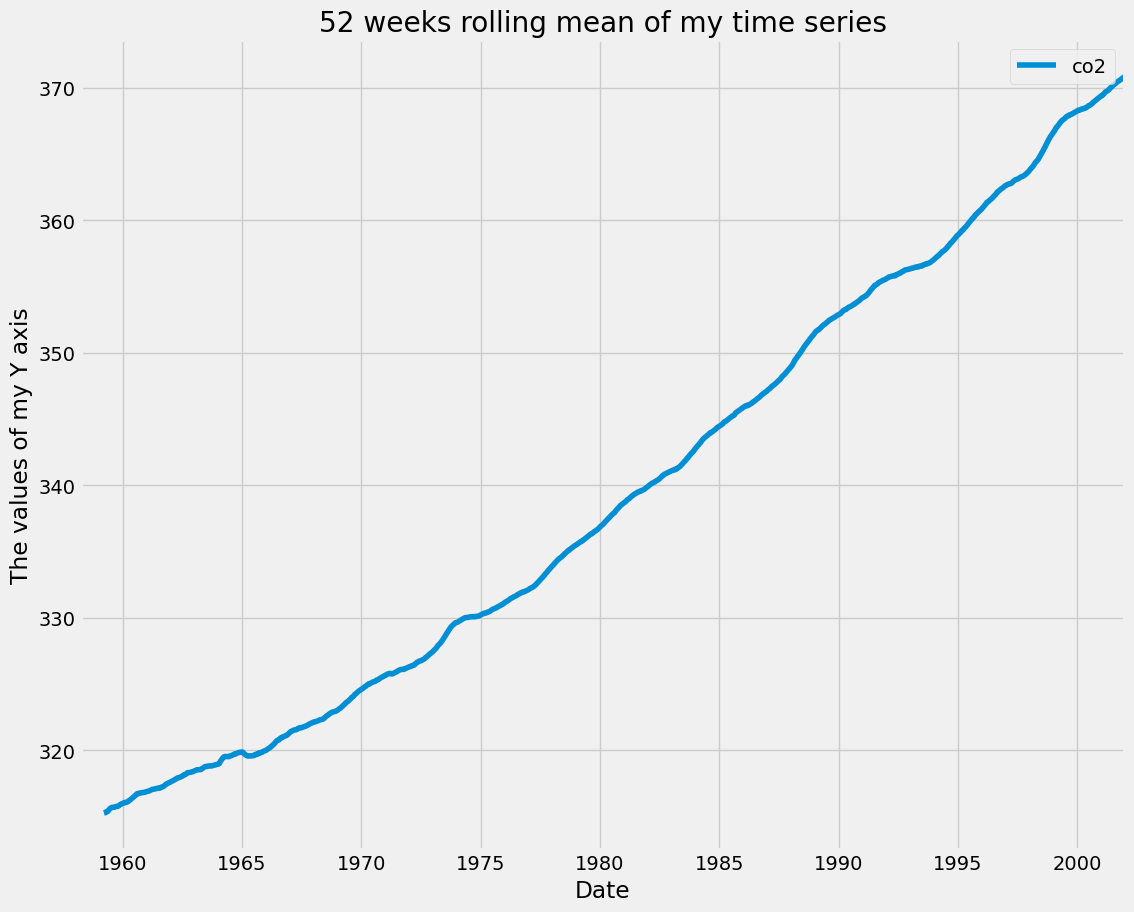

In [14]:
# The moving average model
co2_levels_mean = co2_levels.rolling(window=52).mean()
ax = co2_levels_mean.plot(figsize=(12,10))
ax.set_xlabel("Date")
ax.set_ylabel("The values of my Y axis")
ax.set_title("52 weeks rolling mean of my time series")
plt.show()

Another useful technique to visualize time series data is to take aggregates of the values in your data. For example, the co2_levels data contains weekly data, but you may wish to see how these values behave by month of the year. Because you have set the index of your co2_levels DataFrame as a DateTime type, it is possible to directly extract the day, month, or year of each date in the index. For example, you can extract the month using the command co2_levels .index .month. Similarly, you can extract the year using the command co2_levels .index .year.

Aggregating values in a time series can help answer questions such as “what is the mean value of our time series on Sundays”, or “what is the mean value of our time series during each month of the year”. If the index of your pandas DataFrame consists of DateTime types, then you can extract the indices and group your data by these values. Here, you use the .groupby() and .mean() methods to compute the monthly and yearly averages of the CO2 levels data and assign that to a new variable called co2_levels_by_month and co2_levels_by_year. The .groupby() method allows you to group records into buckets based on a set of defined categories. In this case, the categories are the different months of the year and for each year.



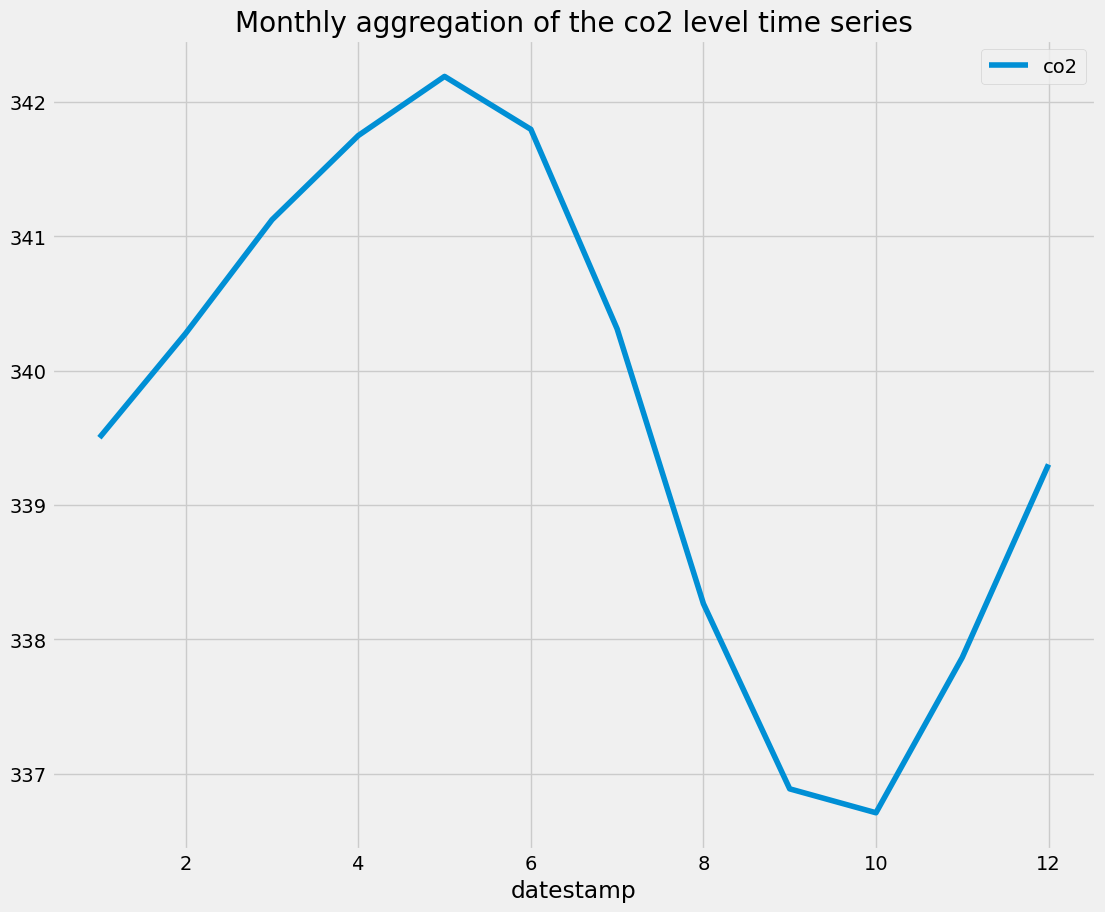

In [15]:
# Plotting aggregate values of your time series
index_month = co2_levels.index.month
co2_levels_by_month = co2_levels.groupby(index_month).mean()
co2_levels_by_month.plot(figsize=(12,10))
plt.title('Monthly aggregation of the co2 level time series')
plt.show()

When we plot co2_levels_by_month , we see that the monthly mean value of CO2 levels peaks during the 5th to 7th months of the year. This is consistent with the fact that during summer we see increased sunlight and CO2 emissions from the environment. I really like this example, as it shows the power of plotting aggregated values of time series data.

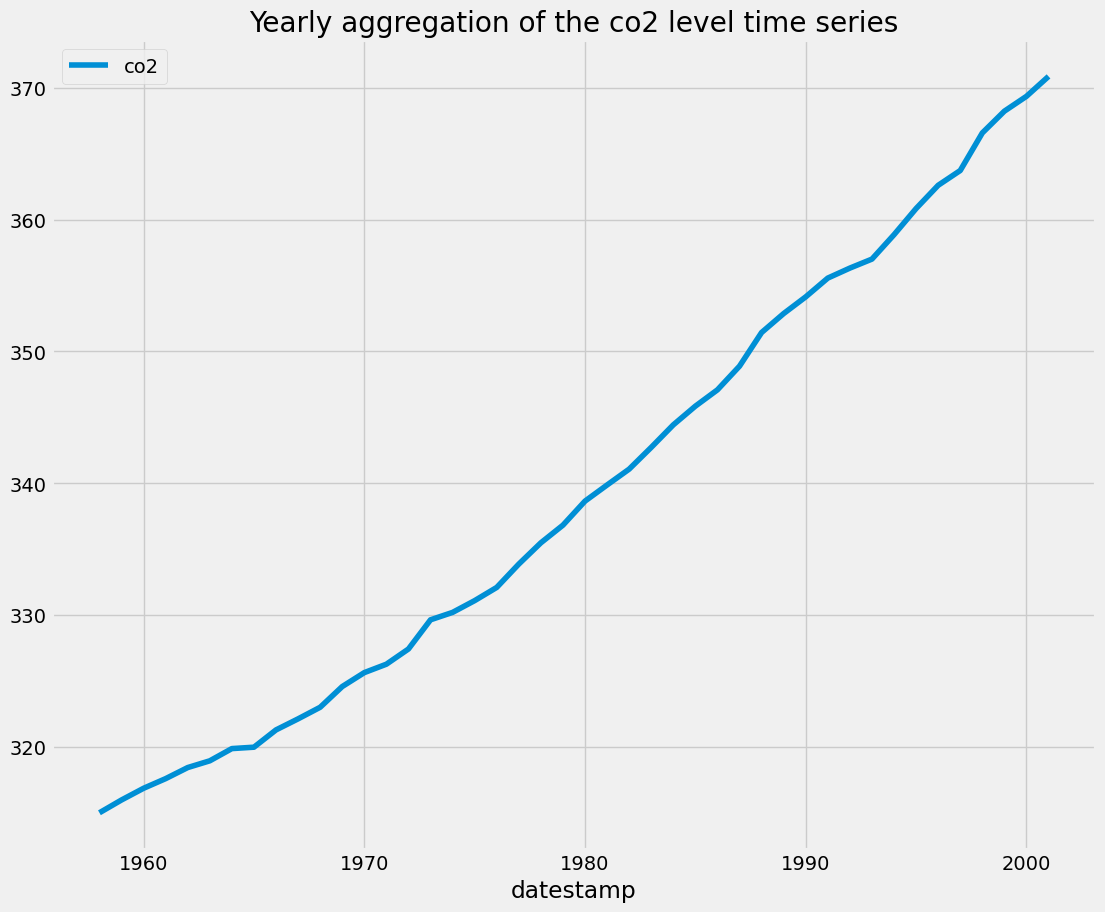

In [16]:
# Plotting aggregate values of your time series
index_year = co2_levels.index.year
co2_levels_by_year = co2_levels.groupby(index_year).mean()
co2_levels_by_year.plot(figsize=(12,10))
plt.title('Yearly aggregation of the co2 level time series')
plt.show()

When we plot co2_levels_by_year, we can see that the co2 level is increasing every year, which is expected.

## 2.3. Summarize the values in the dataset

An important step to understanding the data is to create summary statistics plots of the time series that you are working with. Doing so will allow you to share and discuss the statistical properties of your data that can further support the plots that you generate and any hypotheses that you want to communicate. There are three fundamental plots to visualiz\ae the summary statistics of the data, the box plot, histogram plot, and density plot.

A boxplot provides information on the shape, variability, and median of your data. It is particularly useful to display the range of your data and for identifying any potential outliers.

The lines extending parallel from the boxes are commonly referred to as “whiskers”, which are used to indicate variability outside the upper (which is the 75% percentile) and lower (which is the 25% percentile) quartiles, i.e. outliers. These outliers are usually plotted as individual dots that are in line with whiskers.

Text(0.5, 1.0, 'Boxplot for the co2 levels data')

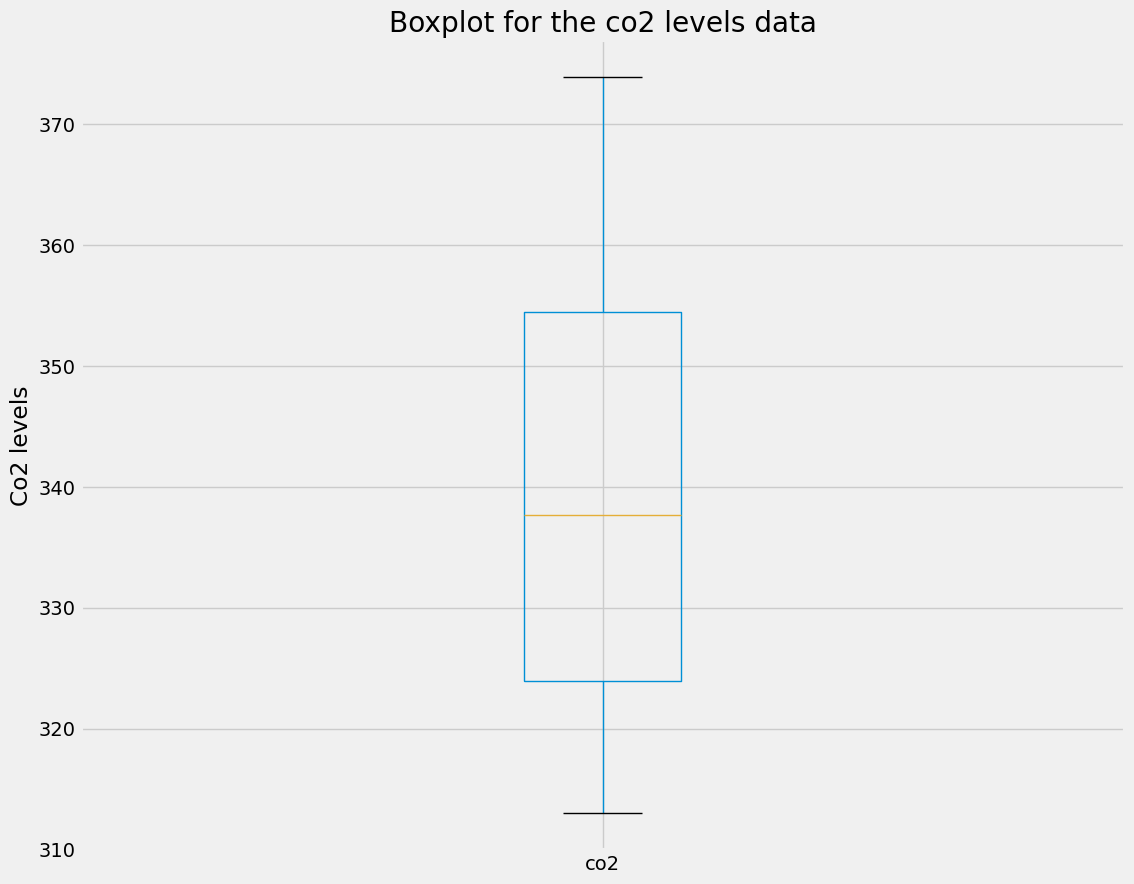

In [17]:
# Summarizing your data with boxplots
ax1 = co2_levels.boxplot(figsize=(12,10))
ax1.set_ylabel('Co2 levels')
ax1.set_title('Boxplot for the co2 levels data')

Histograms are a type of plot that allows you to inspect the underlying distribution of your data. It visualizes the frequency of occurrence of each value in your data. These can sometimes be more useful than boxplots, as non-technical members of your team will often be more familiar with histograms, and therefore are more likely to quickly understand the shape of the data you are exploring or presenting to them.

In pandas, it is possible to produce a histogram by simply using the standard .plot() method and specifying the kind argument as hist. In addition, you can specify the bins parameter, which determines how many intervals you should cut your data into. Regarding the bin parameter, there are no hard and fast rules to find the optimal value of it, it often needs to be found through trial and error.



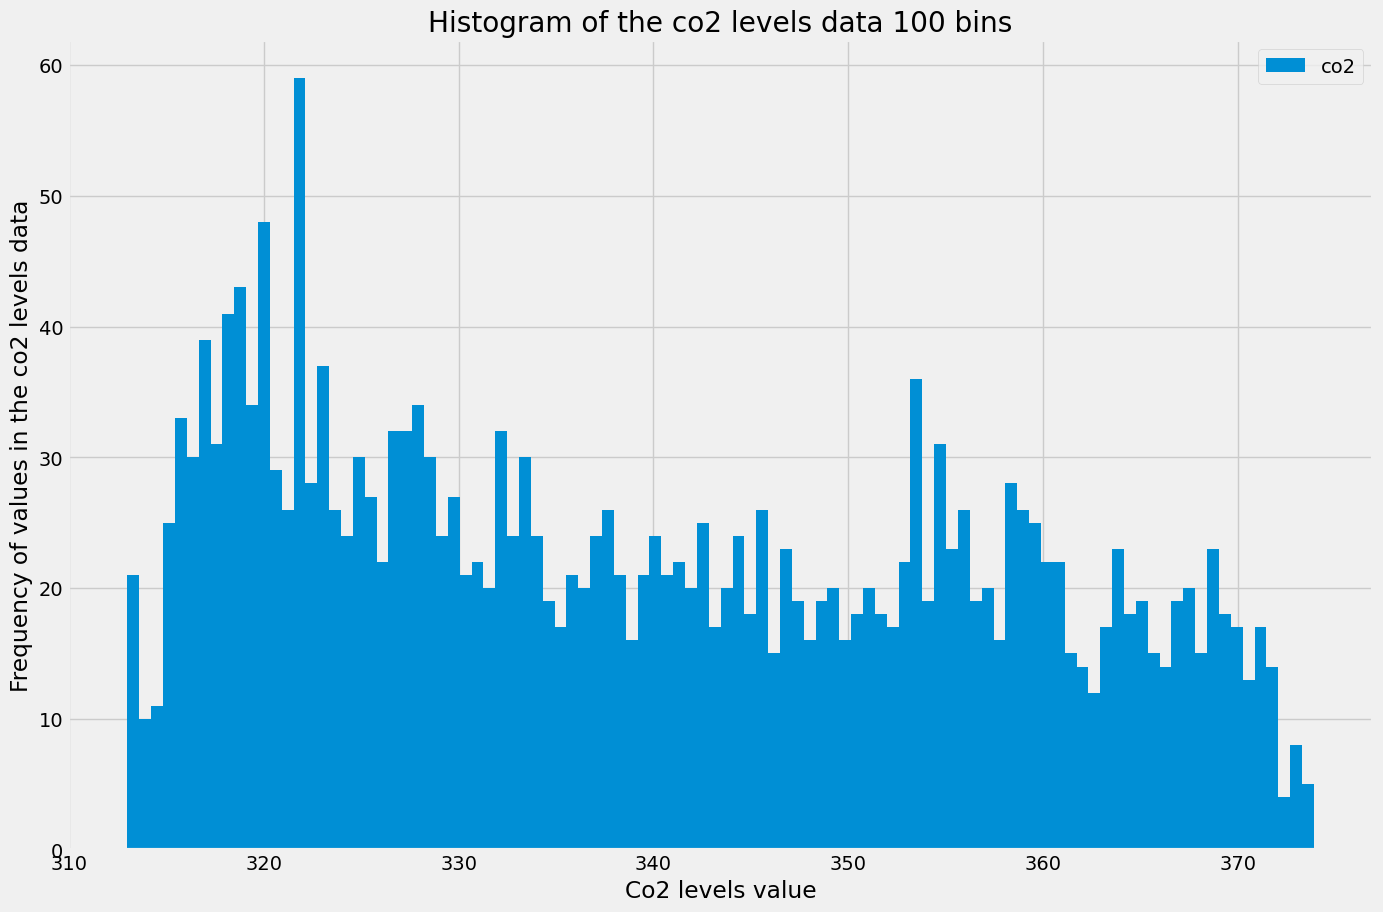

In [18]:
# Summarizing your data with histograms
ax2 = co2_levels.plot(kind='hist', bins=100, figsize=(15,10))
ax2.set_xlabel('Co2 levels value')
ax2.set_ylabel('Frequency of values in the co2 levels data')
ax2.set_title('Histogram of the co2 levels data 100 bins')
plt.show()

Since it can be confusing to identify the optimal number of bins, histograms can be a cumbersome way to assess the distribution of your data. Instead, you can rely on kernel density plots to view the distribution of your data. Kernel density plots are a variation of histograms. They use kernel smoothing to plot the values of your data and allow for smoother distributions by dampening the effect of noise and outliers while displaying where the mass of your data is located. It is simple to generate density plots with the panda's library, as you only need to use the standard .plot() method while specifying the kind argument as density.

Text(0.5, 1.0, 'Density plot of the co2 levels data')

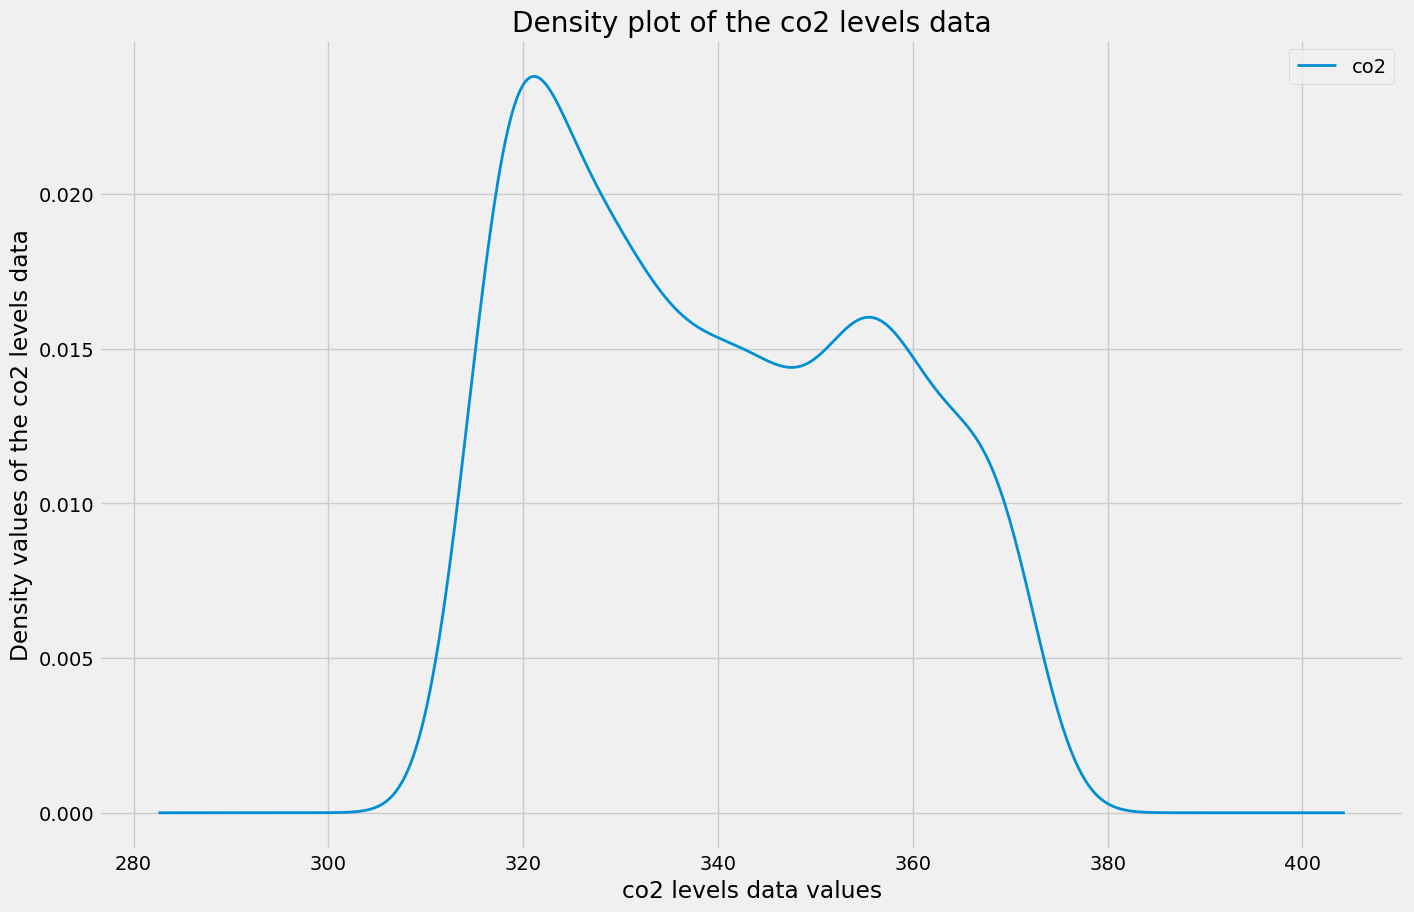

In [19]:
# Summarizing your data with density plots
ax3 = co2_levels.plot(kind='density', linewidth=2, figsize=(15,10))
ax3.set_xlabel('co2 levels data values')
ax3.set_ylabel('Density values of the co2 levels data')
ax3.set_title('Density plot of the co2 levels data')

# 3.Seasonality, Trend and Noise
In this section, We will go beyond summary statistics by learning about autocorrelation and partial autocorrelation plots. You will also learn how to automatically detect seasonality, trend, and noise in your time series data. The autocorrelation and partial autocorrelation were covered in more detail in the previous article of this series.

## 3.1. Autocorrelation and Partial Autocorrelation
Autocorrelation is a measure of the correlation between your time series and a delayed copy of itself. For example, an autocorrelation of order 3 returns the correlation between a time series at points t(1), t(2), t(3), and its own values lagged by 3-time points, i.e. t(4), t(5), t(6). Autocorrelation is used to find repeating patterns or periodic signals in time series data. The principle of autocorrelation can be applied to any signal, and not just time series. Therefore, it is common to encounter the same principle in other fields, where it is also sometimes referred to as autocovariance.

In the example below we will plot the autocorrelation of the co2 level time series using the plot_acf function from the statsmodels library.


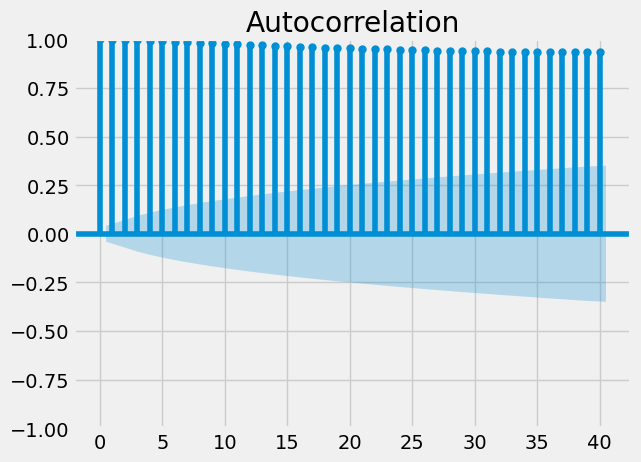

In [20]:
# Plotting autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(co2_levels['co2'], lags=40)
plt.show()

Since autocorrelation is a correlation measure, the autocorrelation coefficient can only take values between -1 and 1. An autocorrelation of 0 indicates no correlation, while 1 and -1 indicate strong negative and positive correlations. In order to help you assess the significance of autocorrelation values, the .plot_acf() function also computes and returns margins of uncertainty, which are represented in the graph as blue-shaded regions. Values above these regions can be interpreted as the time series having a statistically significant relationship with a lagged version of itself.

Going beyond autocorrelation, partial autocorrelation measures the correlation coefficient between a time series and lagged versions of itself. However, it extends this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series at points t(1), t(2), t(3), and lagged values of itself by 3-time points t(4), t(5), t(6), but only after removing all effects attributable to lags 1 and 2.

Just like with autocorrelation, we need to use the statsmodels library to compute and plot the partial autocorrelation in a time series. This example uses the .plot_pacf() function to calculate and plot the partial autocorrelation for the first 40 lags of the co2 level time series.



/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


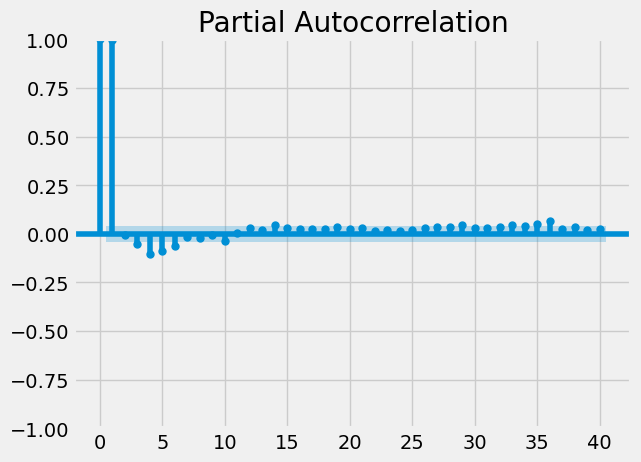

In [21]:
# Plotting partial autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=40)
plt.show()

If partial autocorrelation values are close to 0, you can conclude that values are not correlated with one another. Inversely, partial autocorrelations that have values close to 1 or -1 indicate that there exist strong positive or negative correlations between the lagged observations of the time series. If partial autocorrelation values are beyond the margins of uncertainty, which are marked by the blue-shaded regions, then you can assume that the observed partial autocorrelation values are statistically significant.

## 3.2. Seasonality, trend, and noise in time series data

When looking at time-series data, you may have noticed some clear patterns that they exhibit. As you can see in the co2 levels time series shown below, the data displays a clear upward trend as well as a periodic signal.

<AxesSubplot:xlabel='datestamp'>

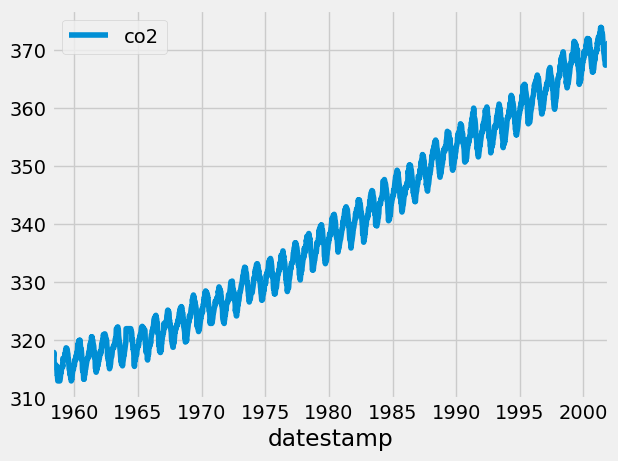

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
co2_levels.plot()

Typically, time series data can be broken down into three main components: seasonality, trend, and noise. Seasonality represents the regular, periodic patterns in the data. Trend describes the overall direction of the time series, whether it's increasing, decreasing, or staying constant over time. Noise represents the unexplained variability or volatility in the data. To gain a better understanding of these components, let's explore an example.

For the decomposition of the time series data, we can utilize the tsa submodule of the statsmodel library. The sm.tsa.dot seasonal_decompose() function provides an out-of-the-box solution for time series decomposition. Let's apply this technique to the co2 level data for a practical demonstration.

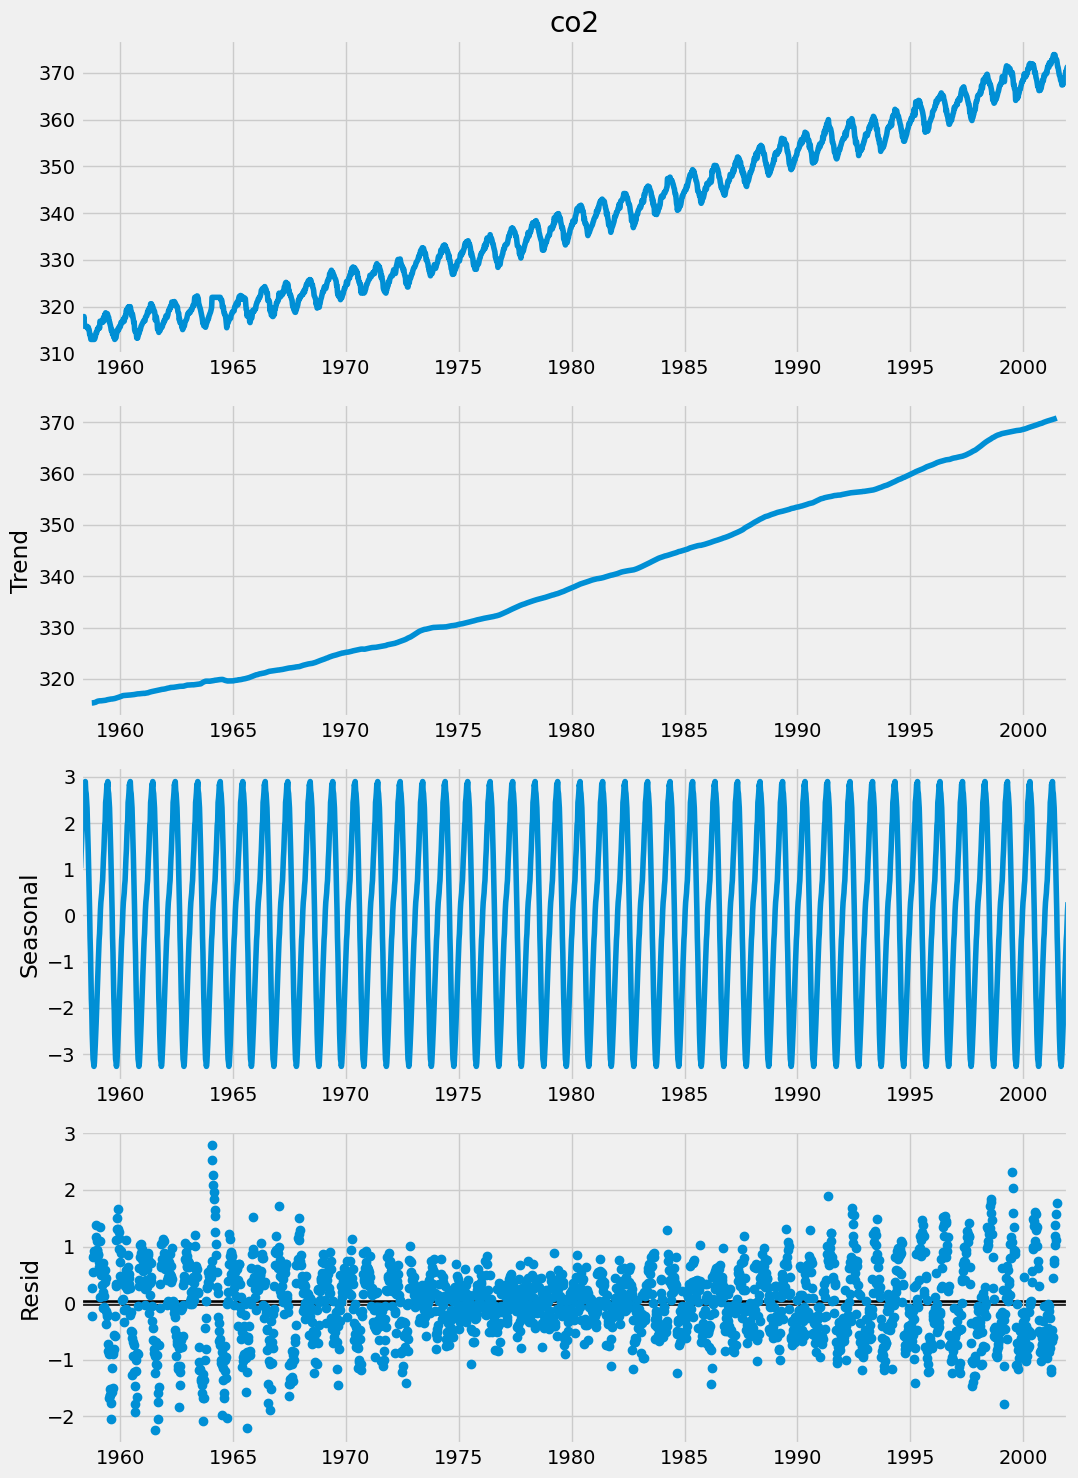

In [23]:
#Time series decomposition 
rcParams['figure.figsize'] = 11, 15  # resizing the image to be big enough for us 

decomposition = sm.tsa.seasonal_decompose(co2_levels['co2'])
fig = decomposition.plot()
plt.show()

It is easy to extract each individual component and plot them. As you can see here, you can use the dir() command to print out the attributes associated with the decomposition variable generated before and to print the seasonal component, use the decomposition.seasonal command.



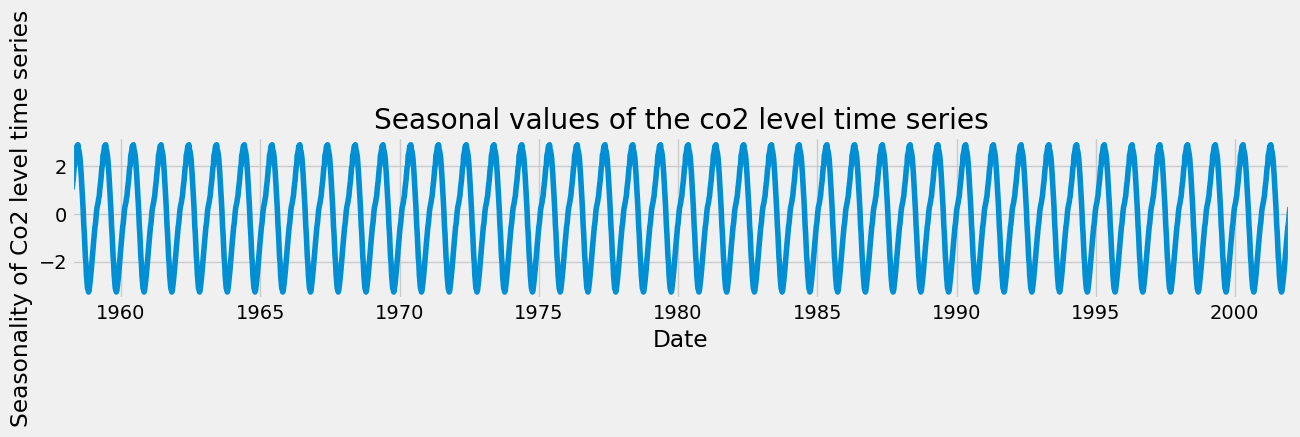

In [24]:
# Seasonality component in time series

decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of Co2 level time series')
ax.set_title('Seasonal values of the co2 level time series')
plt.show()

Seasonal patterns occur when certain factors influence a time series data, causing regular fluctuations at fixed and known intervals. For instance, the daily temperature shows clear daily seasonality with warmer temperatures during the day and cooler temperatures at night. Similarly, monthly seasonality can be observed in the temperature difference between summer and winter.

Now, let's revisit the same analysis and focus on extracting the trend values from the time series decomposition. The trend component represents the general direction or progression of the time series, and it can be obtained using the decomposition.trend command.

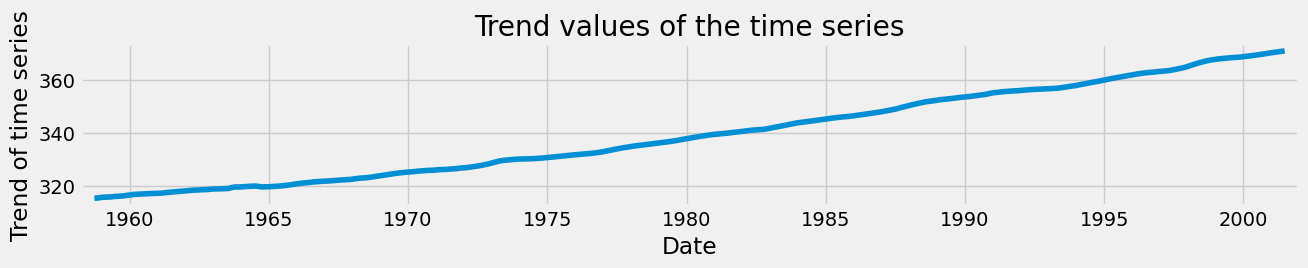

In [25]:
# Trend component in time series
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

Finally, you can also extract the noise, or the residual component of a time series as shown below:

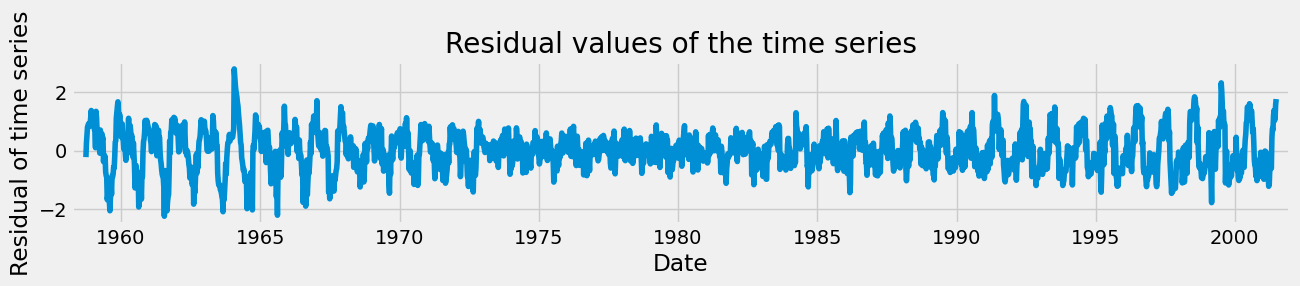

In [26]:
#Noise component in time series
decomp_resid = decomposition.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

The residual component describes random, irregular influences that could not be attributed to either trend or seasonality.

## 3.3. Analyzing airline data

Get ready to polish your expertise using the renowned airline dataset! This dataset includes the total number of monthly airline passengers from January 1949 to December 1960, comprising 144 data points. It's a widely recognized benchmark dataset for time series analysis, and by working with it, you'll be equipped to handle diverse real-world data scenarios.

To kickstart your analysis, load the dataset and generate a visual representation of the monthly airline passenger numbers using the code provided below:

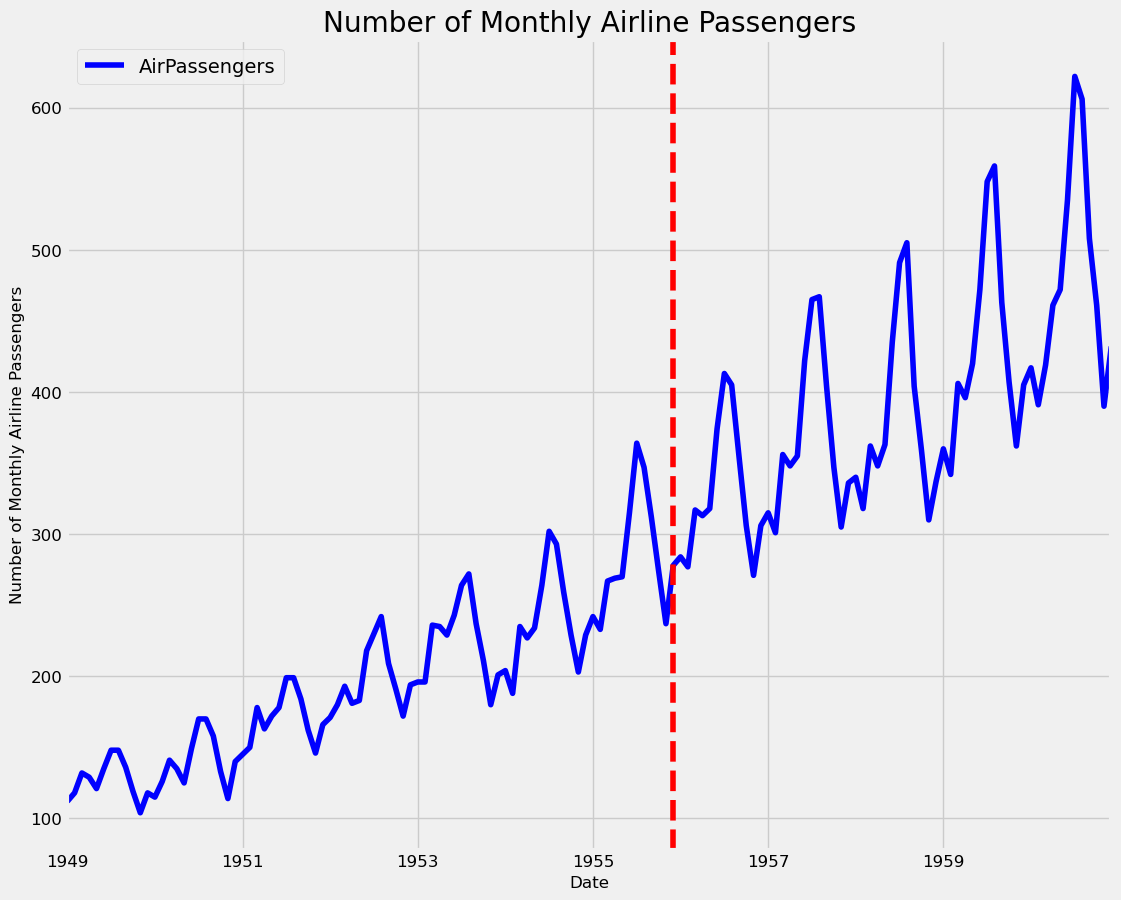

In [27]:
# upload the airline data
airline = pd.read_csv('/kaggle/input/airline-passengers/airline_passengers.csv', parse_dates=['Month'], index_col='Month')

# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12, figsize=(12,10))

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Monthly Airline Passengers', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers')
plt.show()

Then we will plot the summary of the time series by printing the summary of the data and the number of missing values and then plotting the box plot of the time series data.



In [28]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())


AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


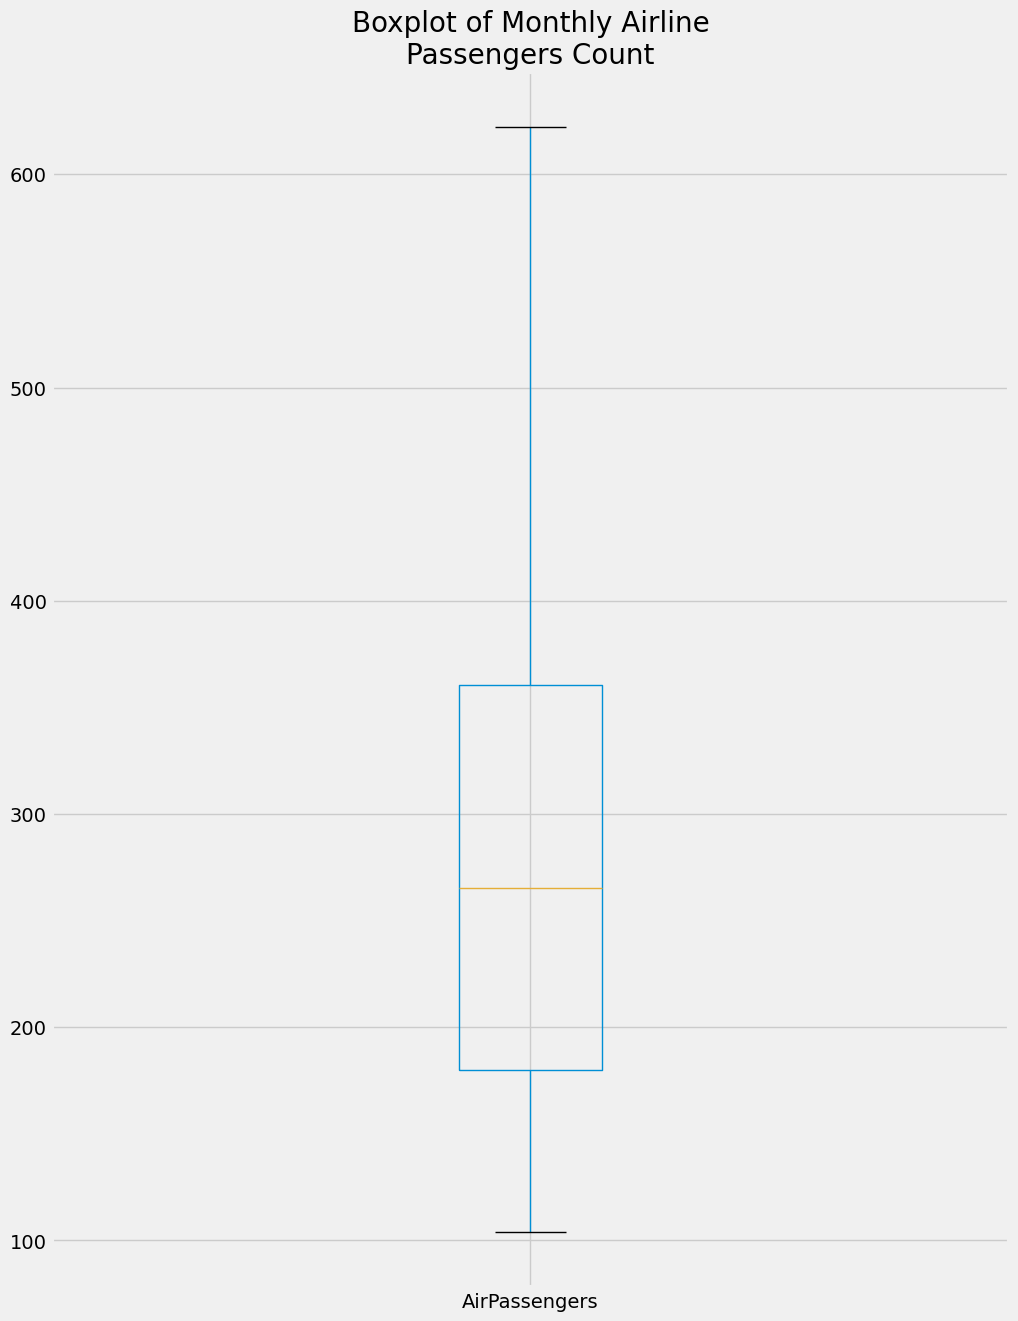

In [29]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

From the boxplot, we can get the following information. The max value of the monthly airline passengers is more than 600 and the minimum is around 100. There are no outliers in the data. The median of the data is around 270 and the 75th percentile is around 360 and the 25th percentile is around 180.

Let's create and plot the monthly aggregation of the airline passengers' data.

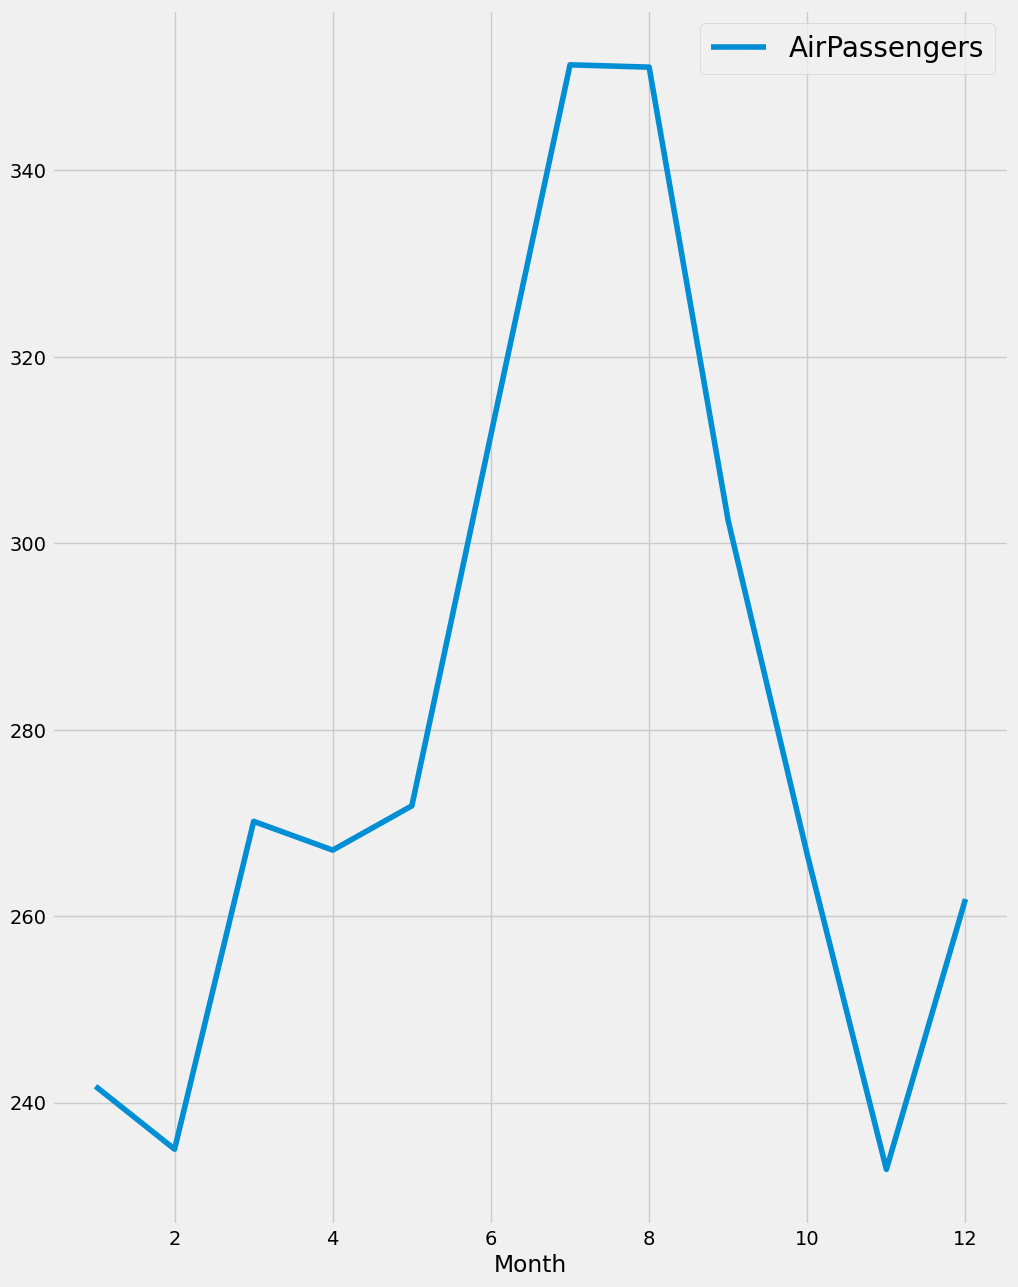

In [30]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

It is obvious that there is a rise in the number of airline passengers in July and August, which is reasonable due to the vacation in this period.

Finally, we will decompose the time series and plot the trend and seasonality in the data.

            Trend   Seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


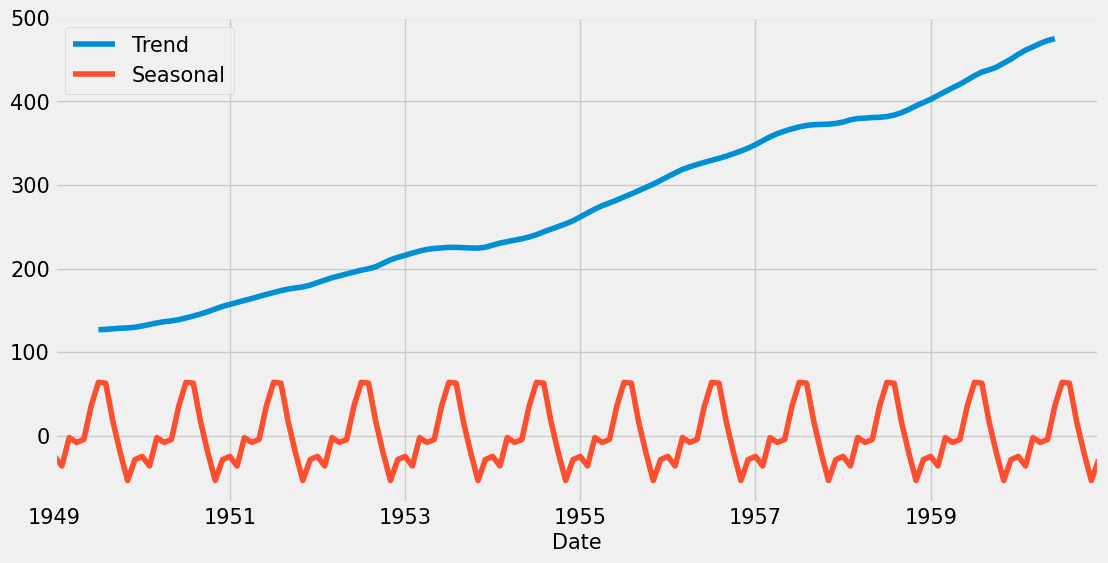

In [31]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

airline_decomposed = pd.DataFrame({'Trend':trend, 'Seasonal':seasonal})

# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head(5))

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

The trend shows that the number of passengers is increasing over the years 1949 to 1959, which is reasonable as the number of airplanes itself increased. There is also seasonality in the data which is expected as shown in the monthly aggregation plot.

# 4. Visualizing Multiple Time Series.

In the field of Data Science, it is common to be involved in projects where multiple time series need to be studied simultaneously. In this section, we will show you how to plot multiple time series at once, and how to discover and describe relationships between multiple time series. In this section, we will be working with a new dataset that contains volumes of different types of meats produced in the United States between 1944 and 2012.

## 4.1 Working with more than one time series

In the field of data science, you will often come across datasets containing multiple time series. For example, we could be measuring the performance of CPU servers over time, and in another case, we could be exploring the stock performance of different companies over time. These situations introduce a number of different questions and therefore require additional analytical tools and visualization techniques.

A convenient aspect of pandas is that dealing with multiple time series is very similar to dealing with a single time series. Just like in the previous sections, you can quickly leverage the .plot() and .describe() methods to visualize and produce statistical summaries of the data.



In [32]:
meat = pd.read_csv("/kaggle/input/meat-data/meat.csv", parse_dates=['date'], index_col='date')
print(meat.head(5))

             beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
date                                                                         
1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

            turkey  
date                
1944-01-01     NaN  
1944-02-01     NaN  
1944-03-01     NaN  
1944-04-01     NaN  
1944-05-01     NaN  


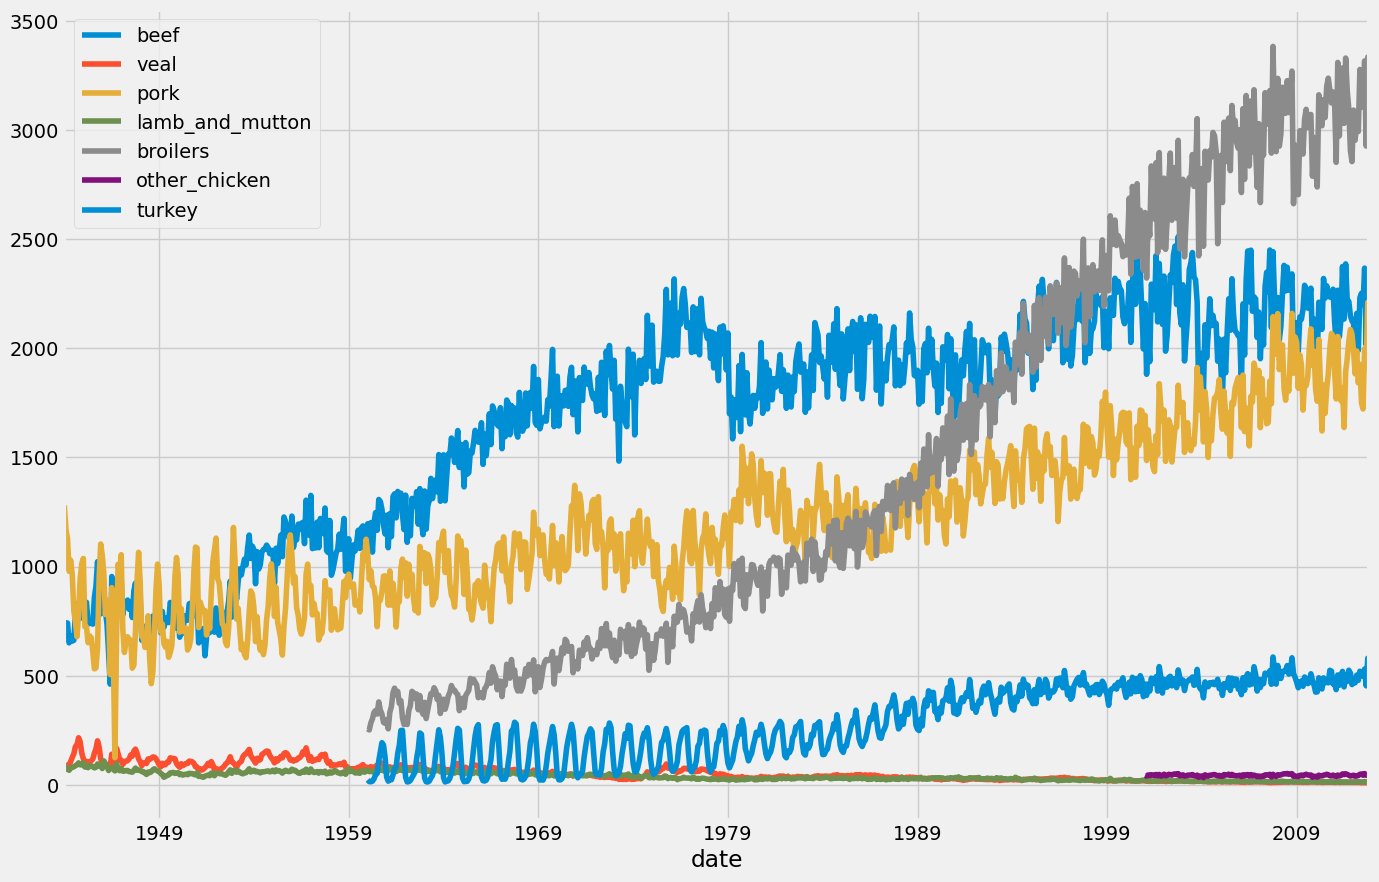

In [33]:
# plotting multiple time series
ax = meat.plot(figsize=(15, 10), fontsize=14)
plt.show()

Another interesting way to plot multiple time series is to use area charts. Area charts are commonly used when dealing with multiple time series and can be leveraged to represent cumulated totals. With the pandas library, you can simply leverage the .area() method as shown on this slide to produce an area chart.

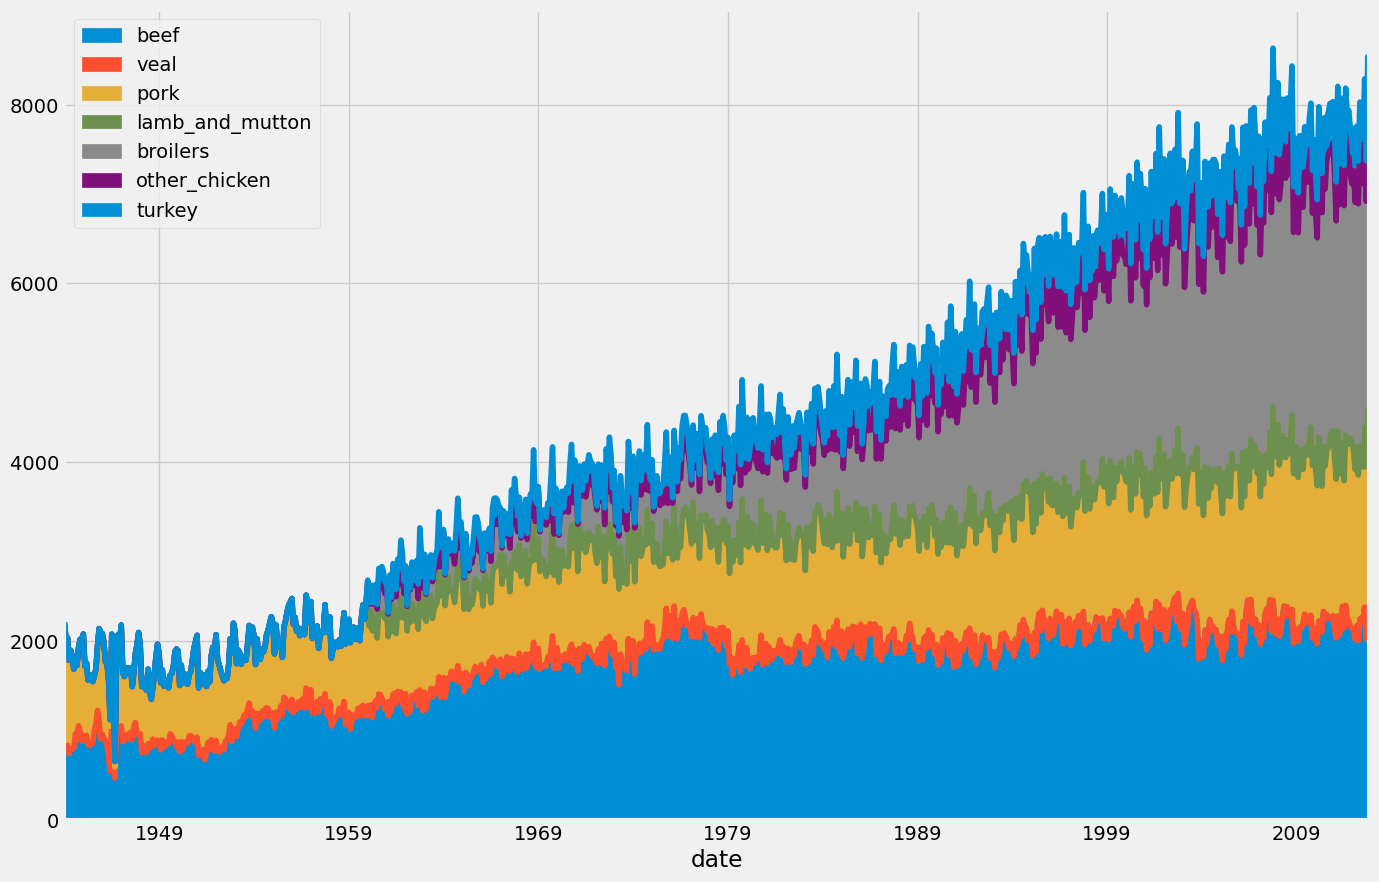

In [34]:
# Area charts
ax = meat.plot.area(figsize=(15, 10), fontsize=14)

## 4.2. Plot multiple time series
When plotting multiple time series, matplotlib will iterate through its default color scheme until all columns in the DataFrame have been plotted. Therefore, the repetition of the default colors may make it difficult to distinguish some of the time series. For example, since there are seven time series in the meat dataset, some time series are assigned the same blue color. In addition, matplotlib does not consider the color of the background, which can also be an issue.

To remedy this, the .plot() method has an additional argument called colormap. This argument allows you to assign a wide range of color palettes with varying contrasts and intensities. You can either define your own Matplotlib colormap or use a string that matches a colormap registered with matplotlib. In this example, we use the Dark2 color palette.

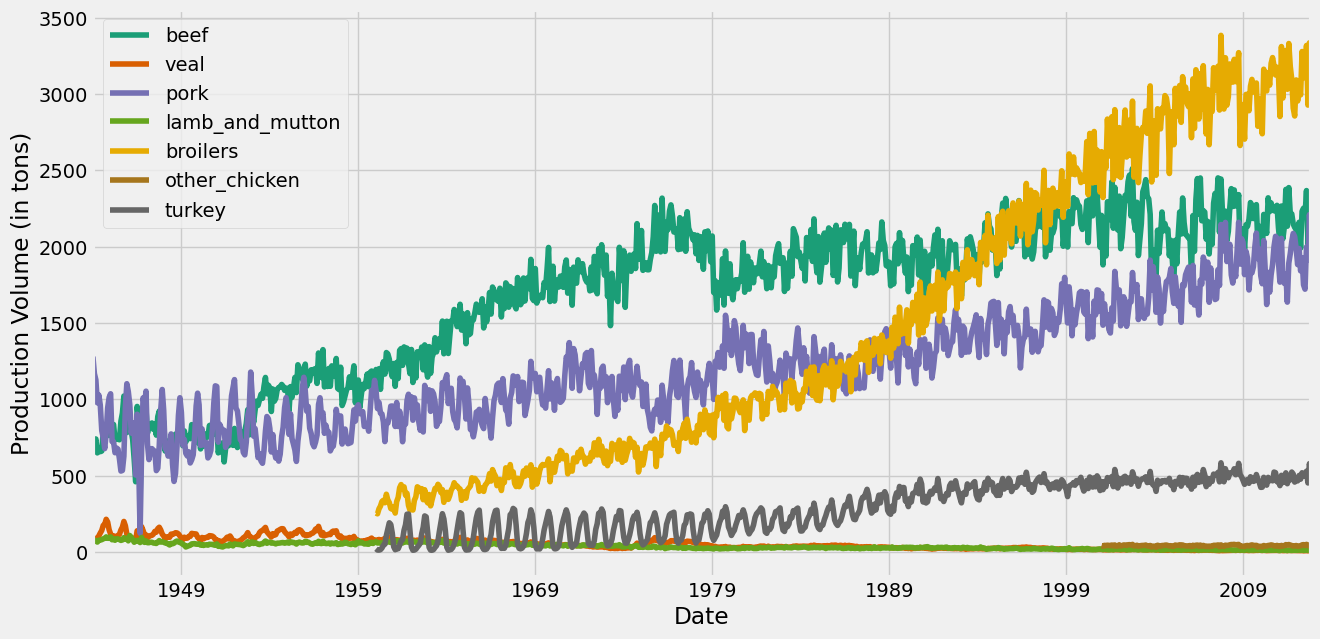

In [35]:
ax = meat.plot(colormap='Dark2', figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Production Volume (in tons)')
plt.show()

When building slides for a presentation or sharing plots with stakeholders, it can be more convenient for yourself and others to visualize both time series plots and numerical summaries on a single graph. In order to do so, first plot the columns of your DataFrame and return the matplotlib AxesSubplot object to the variable ax. You can then pass any table information in pandas as a DataFrame or Series to the ax object. Here we obtain summary statistics of the DataFrame by using the .describe() method and then pass this content as a table with the ax dot table command.



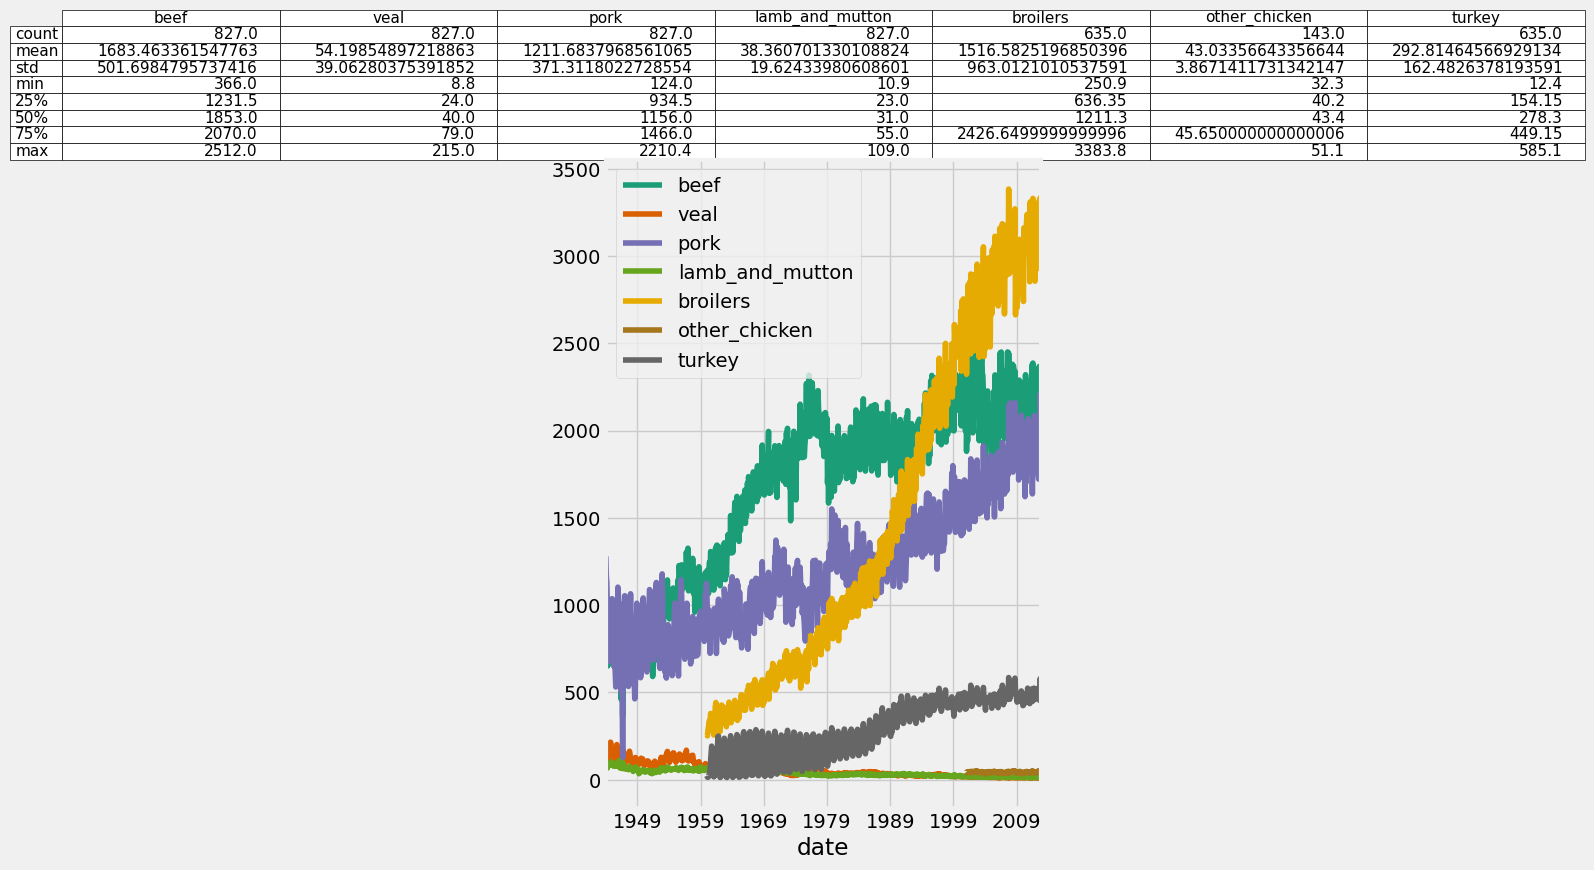

In [36]:
ax = meat.plot(colormap='Dark2', figsize=(5, 8))
df_summary = meat.describe()

# Specify values of cells in the table
ax.table(cellText=df_summary.values,
          # Specify width of the table
          colWidths=[0.5]*len(meat.columns),
          # Specify row labels
          rowLabels=df_summary.index,
          # Specify column labels
          colLabels=df_summary.columns,
          # Specify location of the table
          loc='top')
plt.show()

In order to overcome issues with visualizing datasets containing time series of different scales, you can leverage the subplots argument, which will plot each column of a DataFrame on a different subplot. In addition, the layout of your subplots can be specified using the layout keyword, which accepts two integers specifying the number of rows and columns to use. It is important to ensure that the total number of subplots is greater than or equal to the number of time series in your DataFrame. You can also specify if each subgraph should share the values of their x-axis and y-axis using the sharex and sharey arguments. Finally, you need to specify the total size of your graph (which will contain all subgraphs) using the figsize argument.

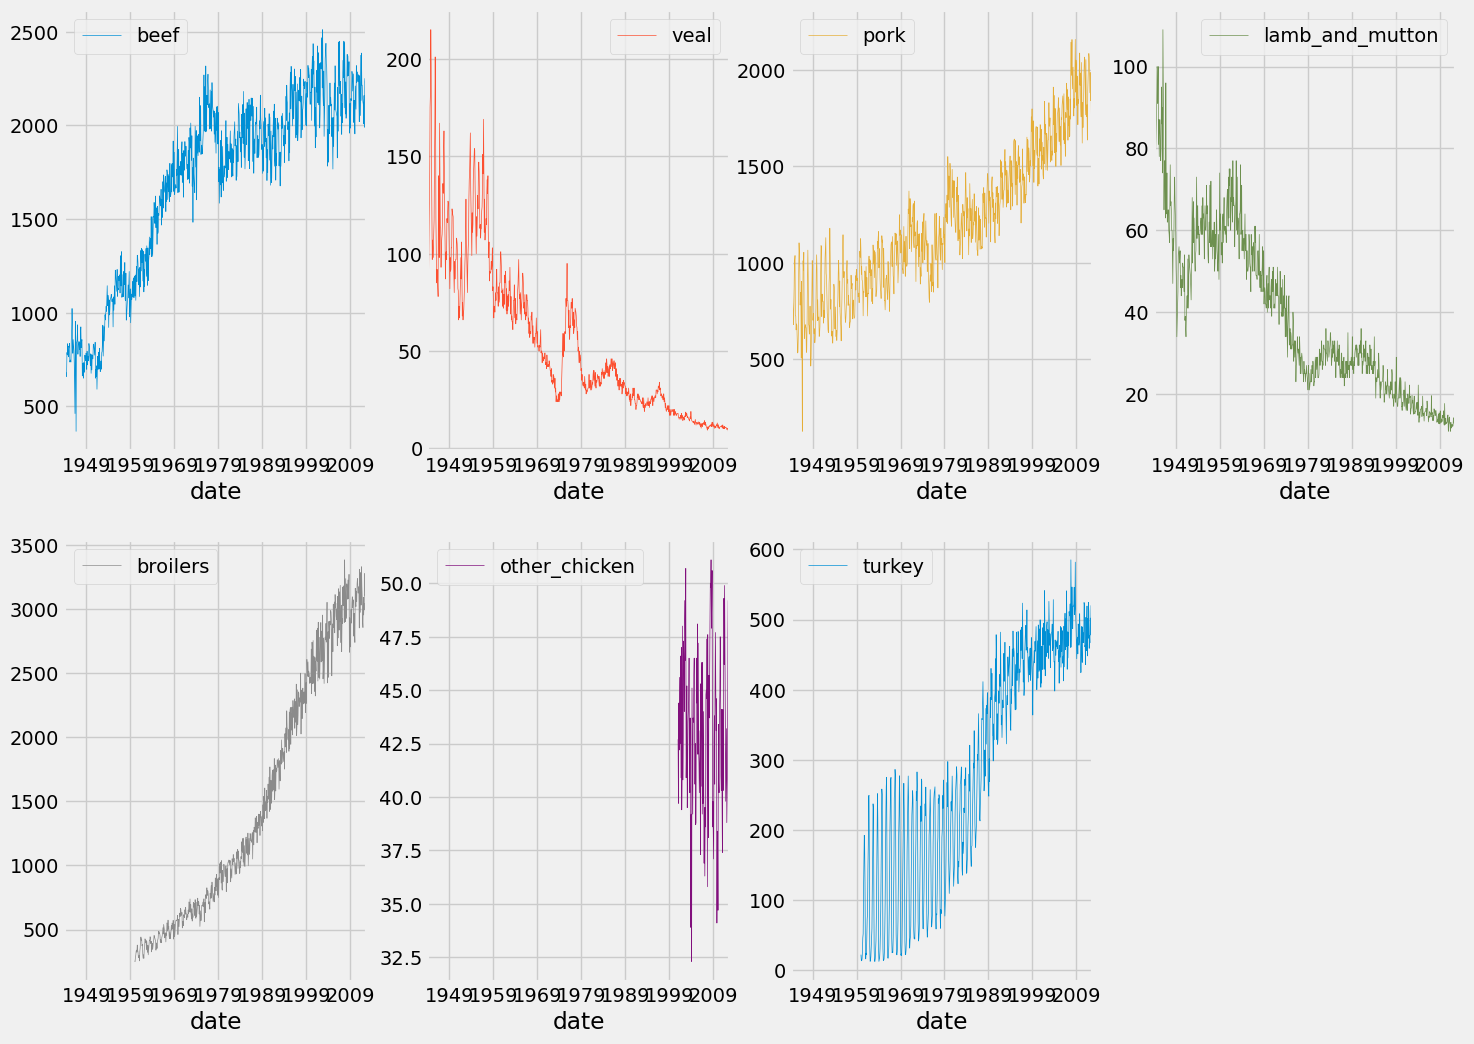

In [37]:
# Facet plots
meat.plot(subplots=True,
        linewidth=0.5,
        layout=(2, 4),
        figsize=(16, 12),
        sharex=False,
        sharey=False)
plt.show()

## 4.3. Find relationships between multiple time series

One of the most widely used methods to assess the similarities between a group of time series is by using the correlation coefficient. The correlation coefficient is a measure used to determine the strength or lack of relationship between two variables. The standard way to compute correlation coefficients is by using Pearson’s coefficient, which should be used when you think that the relationship between your variables of interest is linear. Otherwise, you can use the Kendall Tau or Spearman rank coefficient methods when the relationship between your variables of interest is thought to be non-linear. In Python, you can quickly compute the correlation coefficient between two variables by using the pearsonr, spearmanr, or kendalltau functions in the scipy.stats.stats module. All three of these correlation measures return both the correlation and p-value between the two variables x and y.

If you want to investigate the dependence between multiple variables at the same time, you will need to compute a correlation matrix. The result is a table containing the correlation coefficients between each pair of variables. Correlation coefficients can take any values between -1 and 1. A correlation of 0 indicates no correlation, while 1 and -1 indicate strong positive and negative correlations.

The pandas library comes in with a .corr() method that allows you to measure the correlation between all pairs of columns in a DataFrame. Using the meat dataset, we selected the columns beef, veal, and turkey and invoked the .corr() method by invoking both the Pearson and spearman methods. The results are correlation matrices stored as two new pandas DataFrames called corr_p and corr_s.



In [38]:
# Computing Correlation Matrices
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

corr_p = meat[['beef', 'veal','turkey']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)

corr_s = meat[['beef', 'veal','turkey']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

Pearson correlation matrix
            beef      veal    turkey
beef    1.000000 -0.829704  0.738070
veal   -0.829704  1.000000 -0.768366
turkey  0.738070 -0.768366  1.000000
Spearman correlation matrix
            beef      veal    turkey
beef    1.000000 -0.812437  0.778533
veal   -0.812437  1.000000 -0.829492
turkey  0.778533 -0.829492  1.000000


Once you have stored your correlation matrix in a new DataFrame, it might be easier to visualize it instead of trying to interpret several correlation coefficients at once. In order to achieve this, we will introduce the Seaborn library, which will be used to produce a heatmap of our correlation matrix.


<AxesSubplot:>

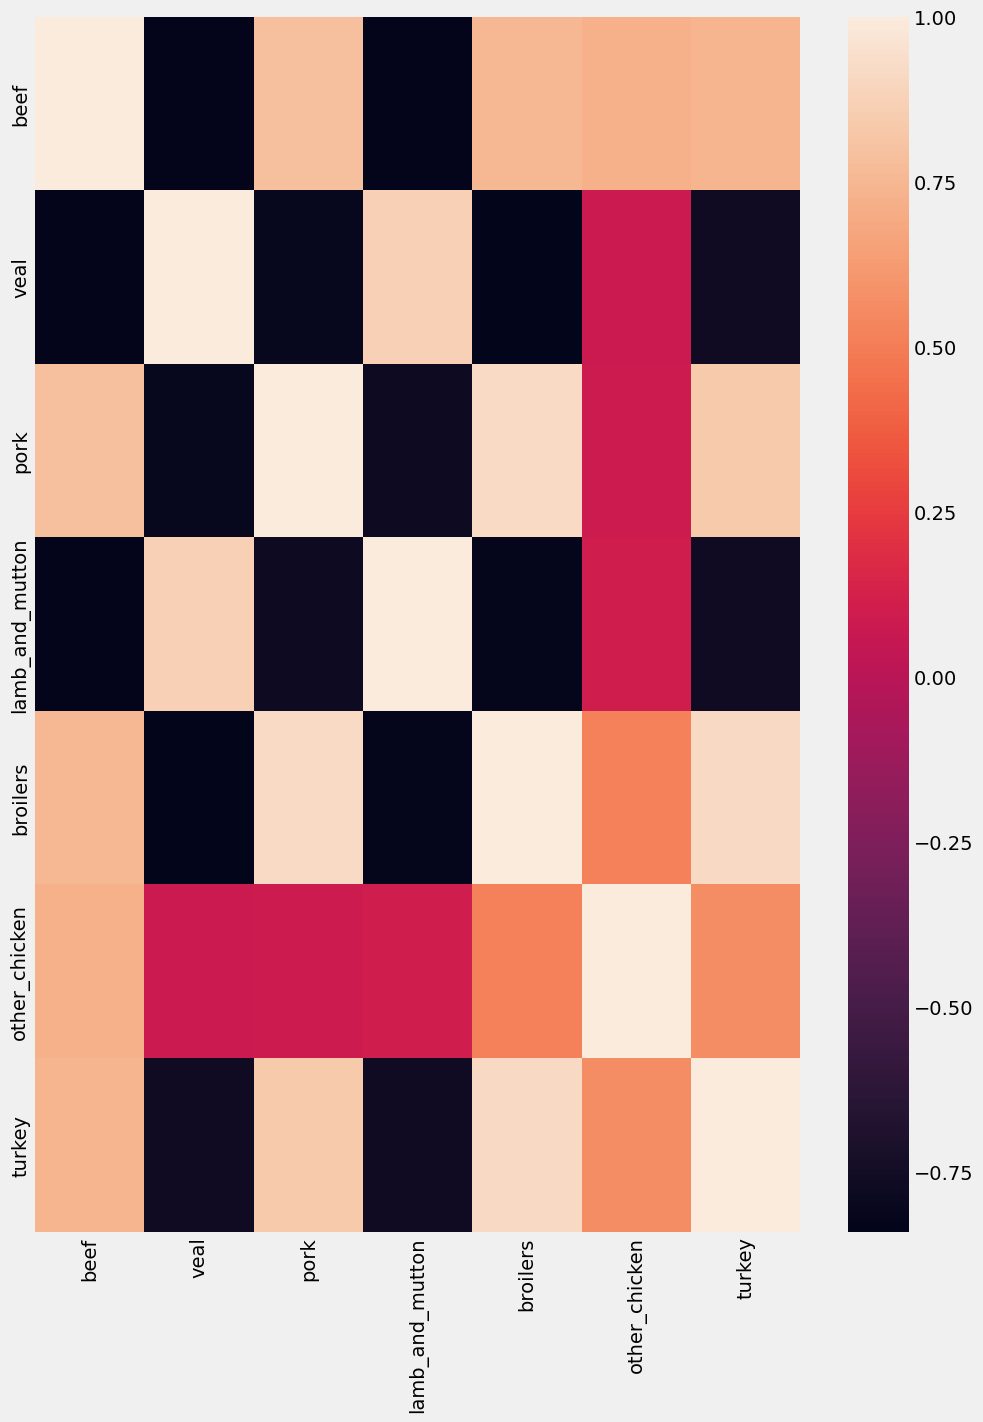

In [39]:
import seaborn as sns
corr_mat = meat.corr(method='pearson')
sns.heatmap(corr_mat)

Heatmap is a useful tool to visualize correlation matrices, but the lack of order can make it difficult to read, or even identify which groups of time series are the most similar. For this reason, it is recommended to leverage the .clustermap() function in the seaborn library, which applies hierarchical clustering to your correlation matrix to plot a sorted heatmap, where similar time series are placed closer to one another.

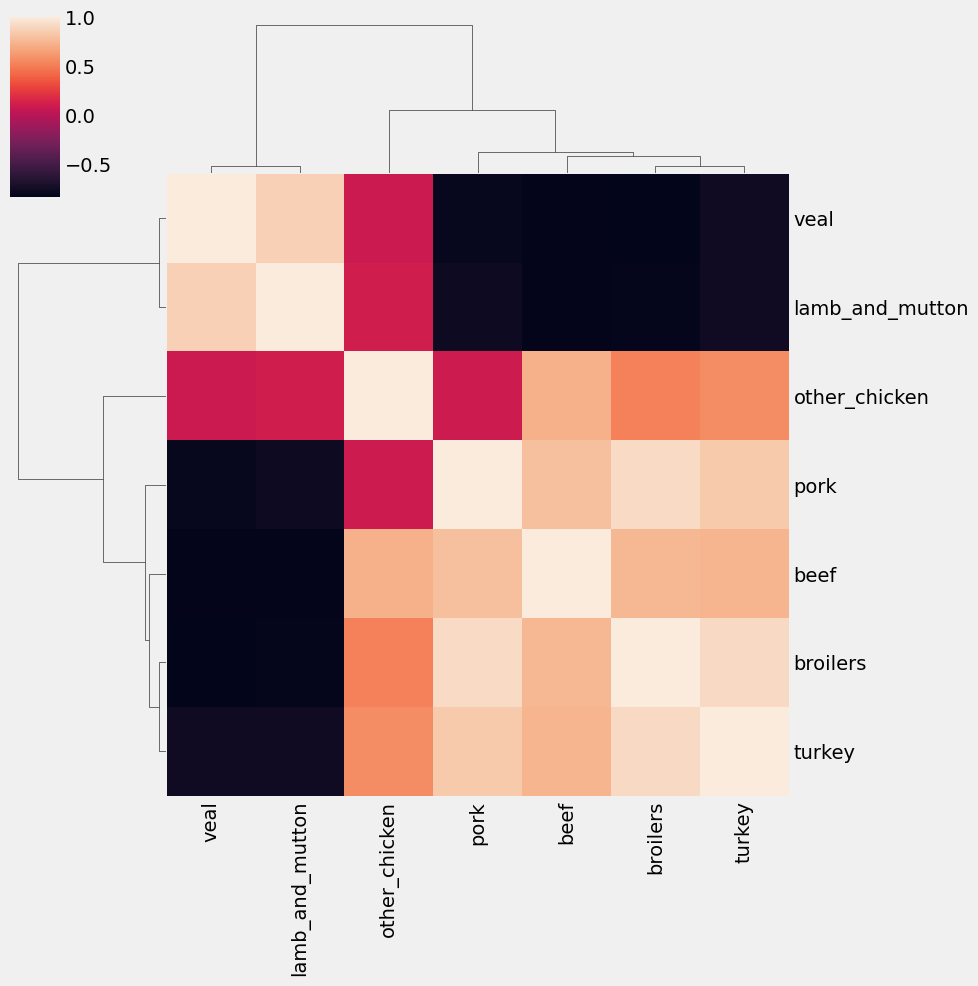

In [40]:
# Clustermap
sns.clustermap(corr_mat)

# 5. Case Study: Unemployment Rate
In this section, we will practice all the concepts covered in the course. We will visualize the unemployment rate in the US from 2000 to 2010. The jobs dataset contains time series for 16 industries across a total of 122 time points one per month for 10 years.

## 5.1. Explore the data
The first step in data exploration is to print the summary statistics and plot the summary of the data using a boxplot.

In [41]:
# Read in jobs file
jobs = pd.read_csv('/kaggle/input/employment/employment.csv')

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

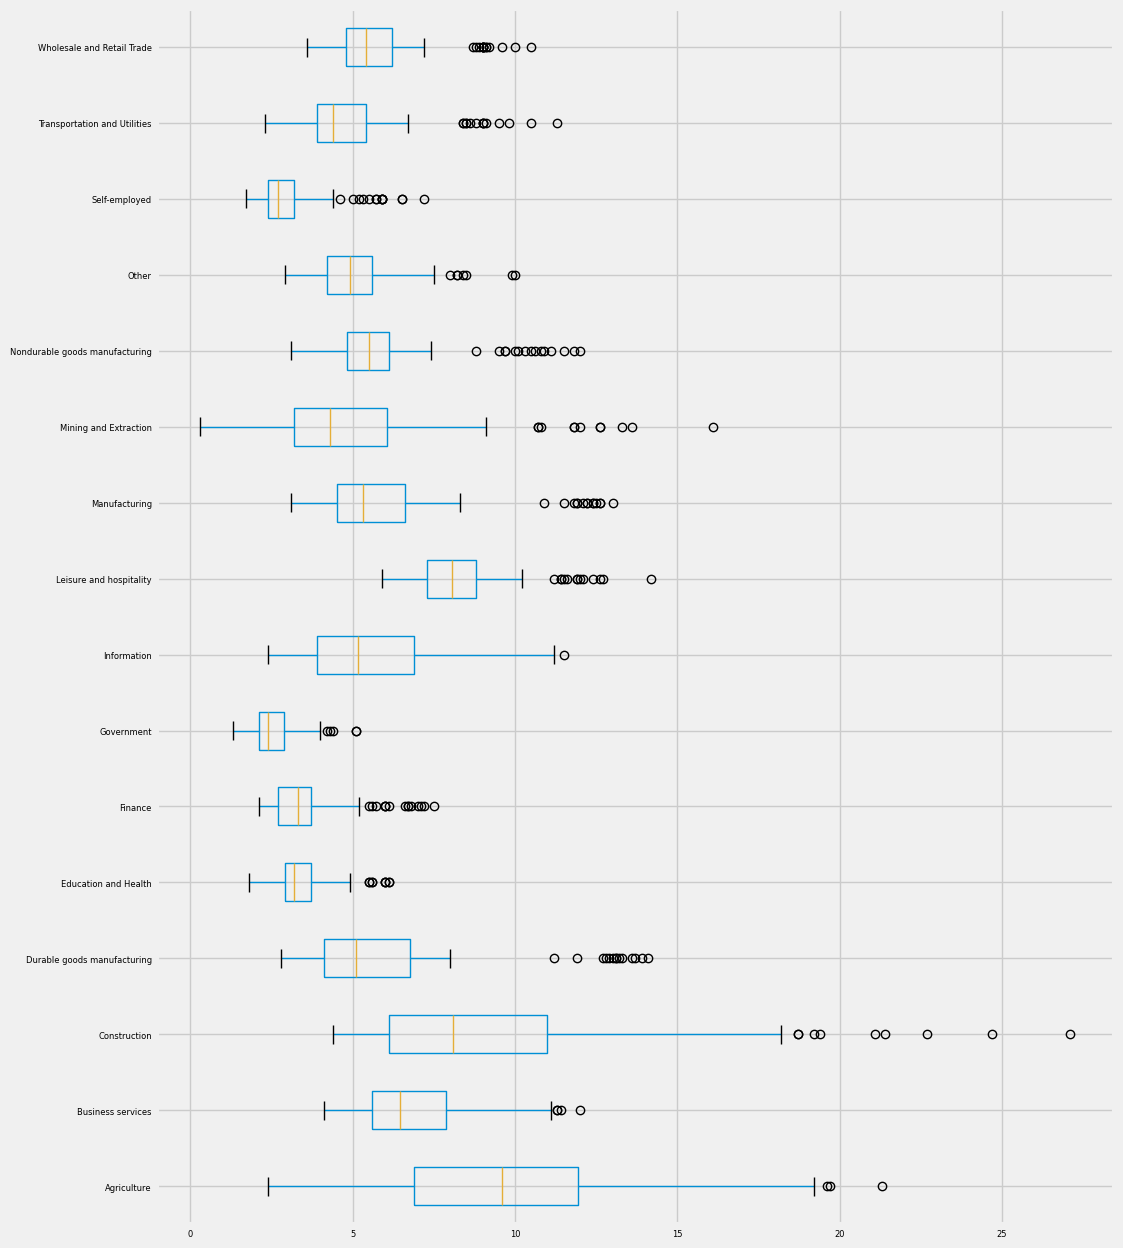

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [42]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

we can also plot a line plot for each feature in one facet plot as the following:

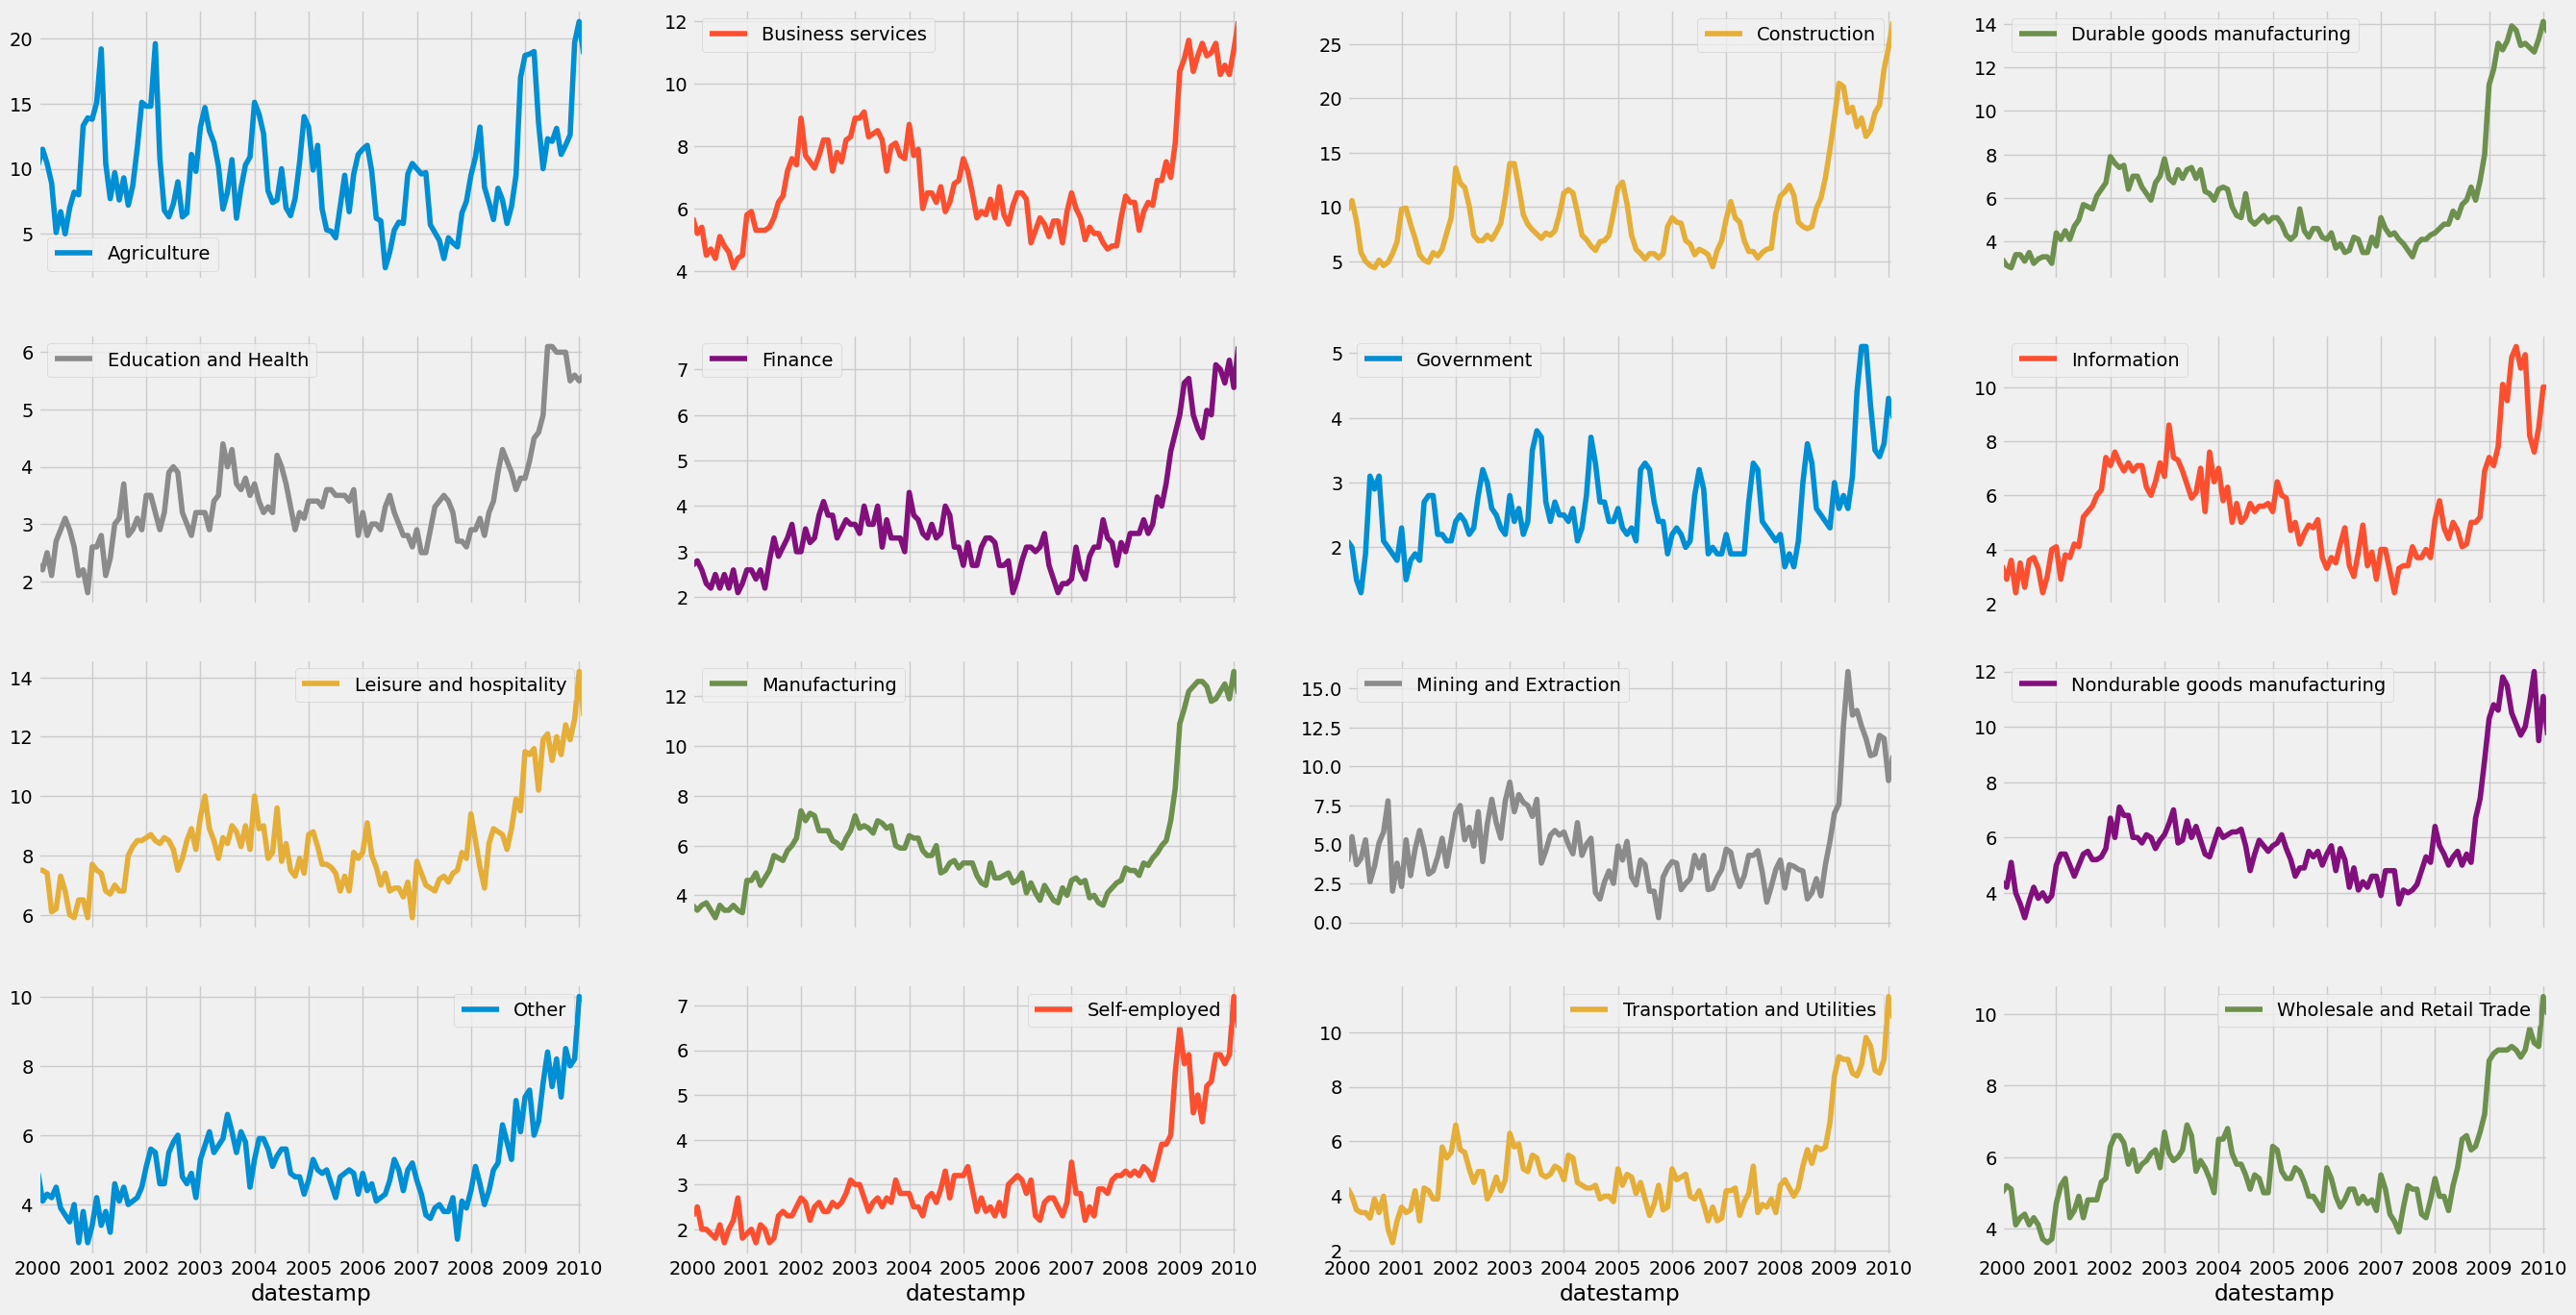

In [43]:
# Facet plots of the jobs dataset
jobs.plot(subplots=True, layout=(4, 4),
          figsize=(30, 16),
          sharex=True,
          sharey=False)
plt.show()

As you can see, the unemployment rate in the USA skyrocketed after the 2008 financial crisis. It is impressive to see how all industries were affected! Since 2008 appears to be the year when the unemployment rate in the USA started increasing, let’s annotate our plot with verticals lines using the familiar axvline notation.

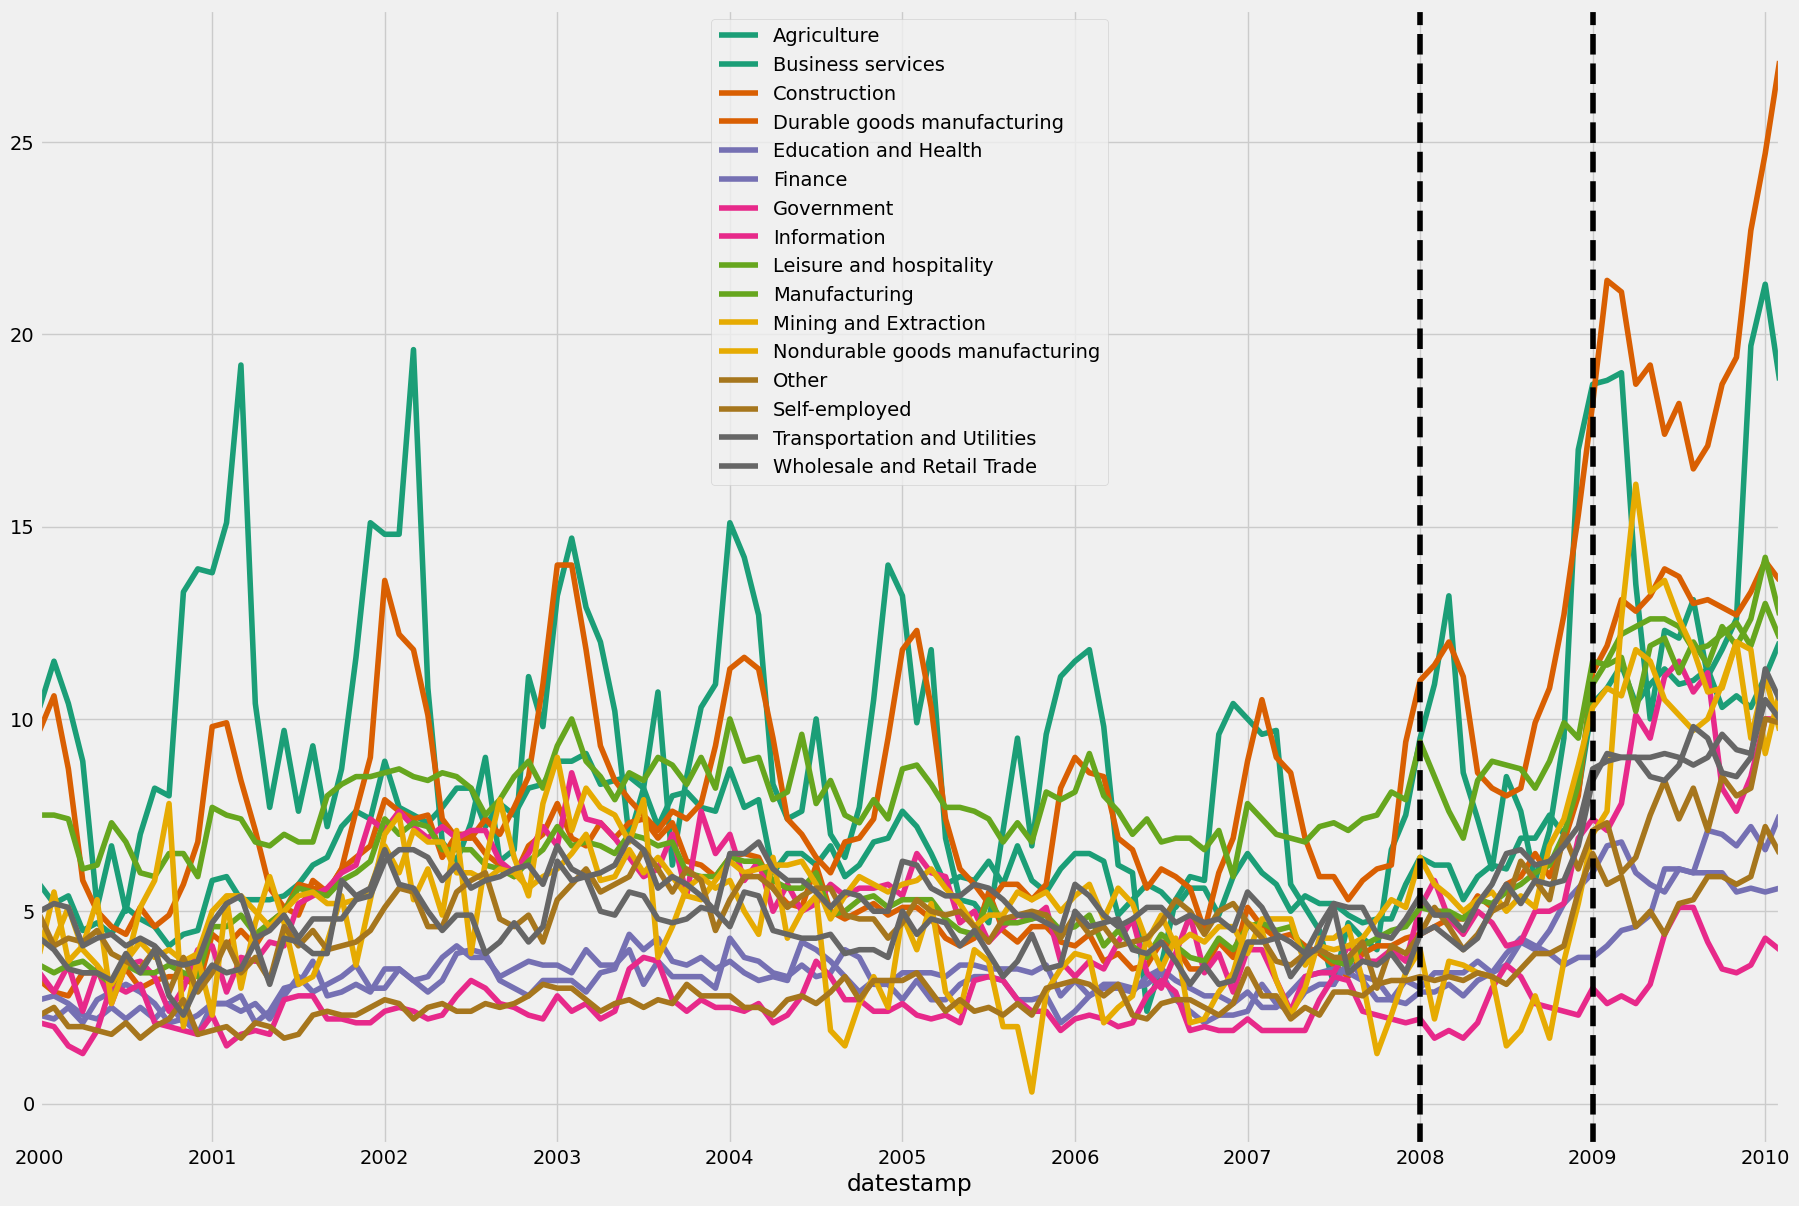

In [44]:
# Annotating events in the jobs dataset
ax = jobs.plot(figsize=(20, 14), colormap='Dark2')
ax.axvline('2008-01-01', color='black', linestyle='--')
ax.axvline('2009-01-01', color='black', linestyle='--')

We can also calculate and plot the monthly or daily average of the unemployment rate for each job section as shown before in section 2.

           Agriculture  Business services  Construction  \
datestamp                                                 
1            13.763636           7.863636     12.909091   
2            13.645455           7.645455     13.600000   
3            13.830000           7.130000     11.290000   
4             9.130000           6.270000      9.450000   
5             7.100000           6.600000      8.120000   
6             6.770000           6.720000      7.430000   
7             7.010000           6.740000      7.350000   
8             8.080000           6.570000      7.300000   
9             7.090000           6.790000      7.560000   
10            7.490000           6.710000      7.840000   
11           10.470000           6.750000      8.700000   
12           12.940000           7.080000     10.800000   

           Durable goods manufacturing  Education and Health   Finance  \
datestamp                                                                
1                        

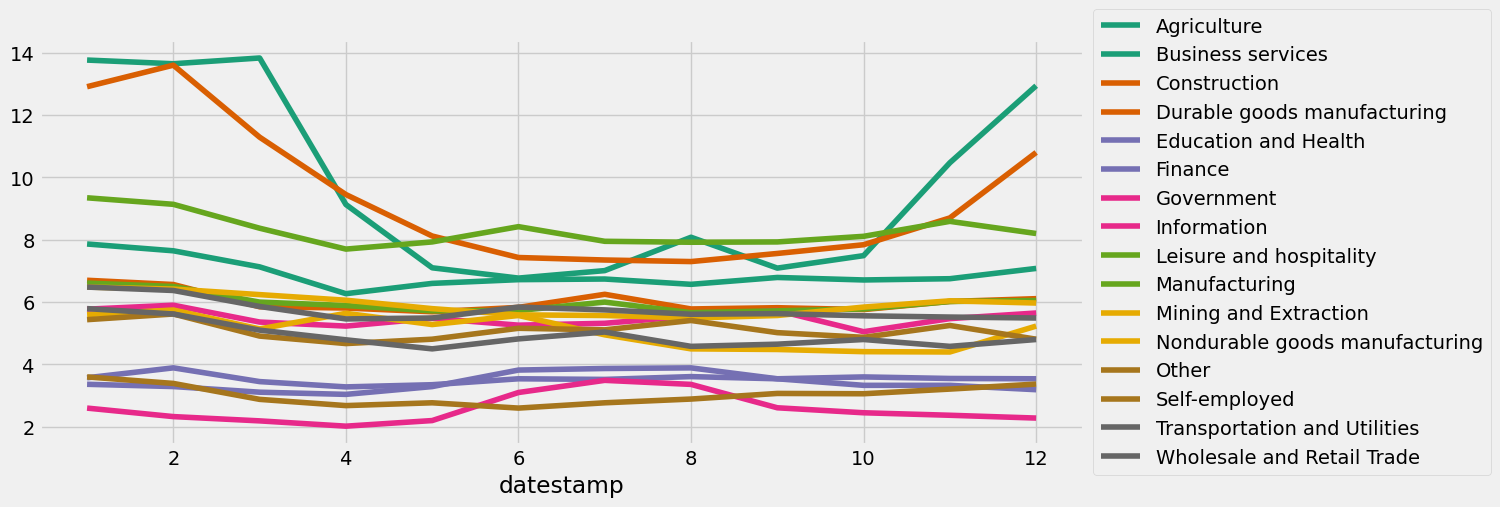

In [45]:
#Monthly averages in the jobs dataset
index_month = jobs.index.month
jobs_by_month = jobs.groupby(index_month).mean()
print(jobs_by_month)
ax = jobs_by_month.plot(figsize=(12, 5), colormap='Dark2')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')

The resulting plot shows some interesting patterns! For example, the unemployment rate for the Agriculture and Construction industries shows significant peaks during the winter months, which is consistent with the idea that these industries will far less active during the cold weather months!

## 5.2. Seasonality, trend, and noise in the time series
In the previous subsection, we extract interesting patterns and seasonality from some of the time series in the jobs dataset. In section 3, the concept of time series decomposition was introduced, which allows us to automatically extract the seasonality, trend, and noise of the time series.

In the code below, we will begin by initializing a my_dict dictionary and extracting the column names of the jobs dataset.

In [46]:
# Decomposing multiple time series with Python dictionaries
# Import the statsmodel library
import statsmodels.api as sm
# Initialize a dictionary
my_dict = {}
# Extract the names of the time series
ts_names = jobs.columns
print(ts_names)

Index(['Agriculture', 'Business services', 'Construction',
       'Durable goods manufacturing', 'Education and Health', 'Finance',
       'Government', 'Information', 'Leisure and hospitality', 'Manufacturing',
       'Mining and Extraction', 'Nondurable goods manufacturing', 'Other',
       'Self-employed', 'Transportation and Utilities',
       'Wholesale and Retail Trade'],
      dtype='object')


Then, we will use a “for” loop to iterate through the columns of df and apply the seasonal_decompose() function from the statsmodels library, which is stored in my_dict. Then we will extract the trend component and store it in a new Dataframe and plot it.



In [47]:
# Run time series decomposition
for ts in ts_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    my_dict[ts] = ts_decomposition

In [48]:
# Initialize a new dictionnary for each component
my_dict_trend = {}
my_dict_seasonal = {}
my_dict_resid = {}
# Extract the trend component
for ts in ts_names:
    my_dict_trend[ts] = my_dict[ts].trend
    my_dict_seasonal[ts] = my_dict[ts].seasonal
    my_dict_resid[ts] = my_dict[ts].resid

# Convert to a DataFrame
trend_df = pd.DataFrame.from_dict(my_dict_trend)
seasonal_df = pd.DataFrame.from_dict(my_dict_seasonal)
resid_df = pd.DataFrame.from_dict(my_dict_resid)



Let's now plot the three components. First is the seasonal component of the jobs dataset:


Text(0.5, 0, 'Years')

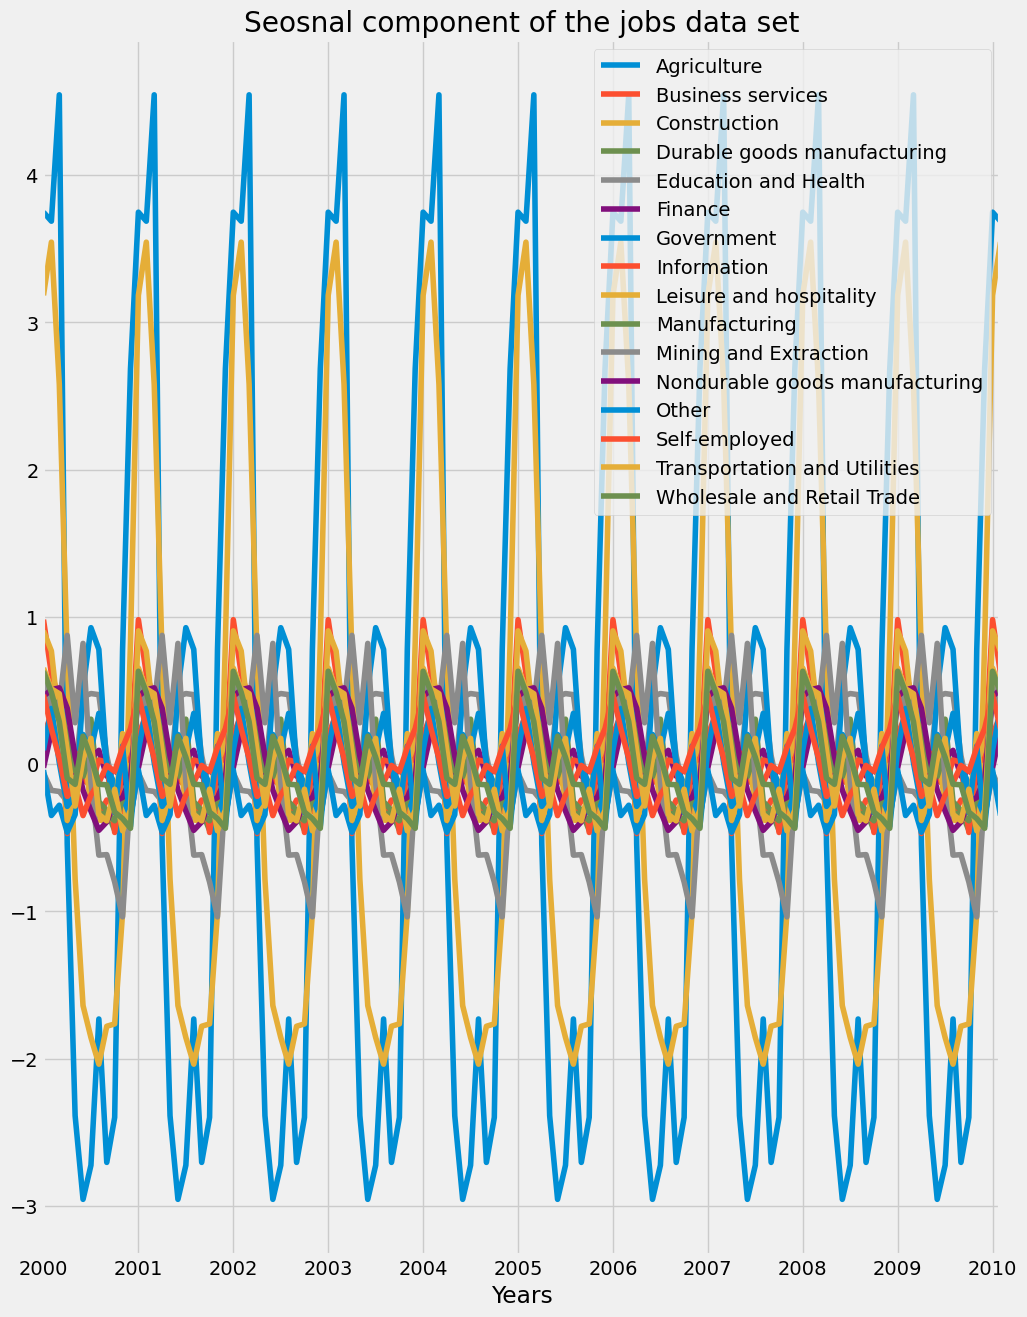

In [49]:
seasonal_df.plot()
plt.title('Seosnal component of the jobs data set')
plt.xlabel('Years')

We can see that certain industries were more affected by seasonality than the others, as we saw that the Agriculture and Construction industries saw rises in unemployment rates during the colder months of winter. Next, the trend component of the jobs dataset is plotted:

Text(0.5, 0, 'Years')

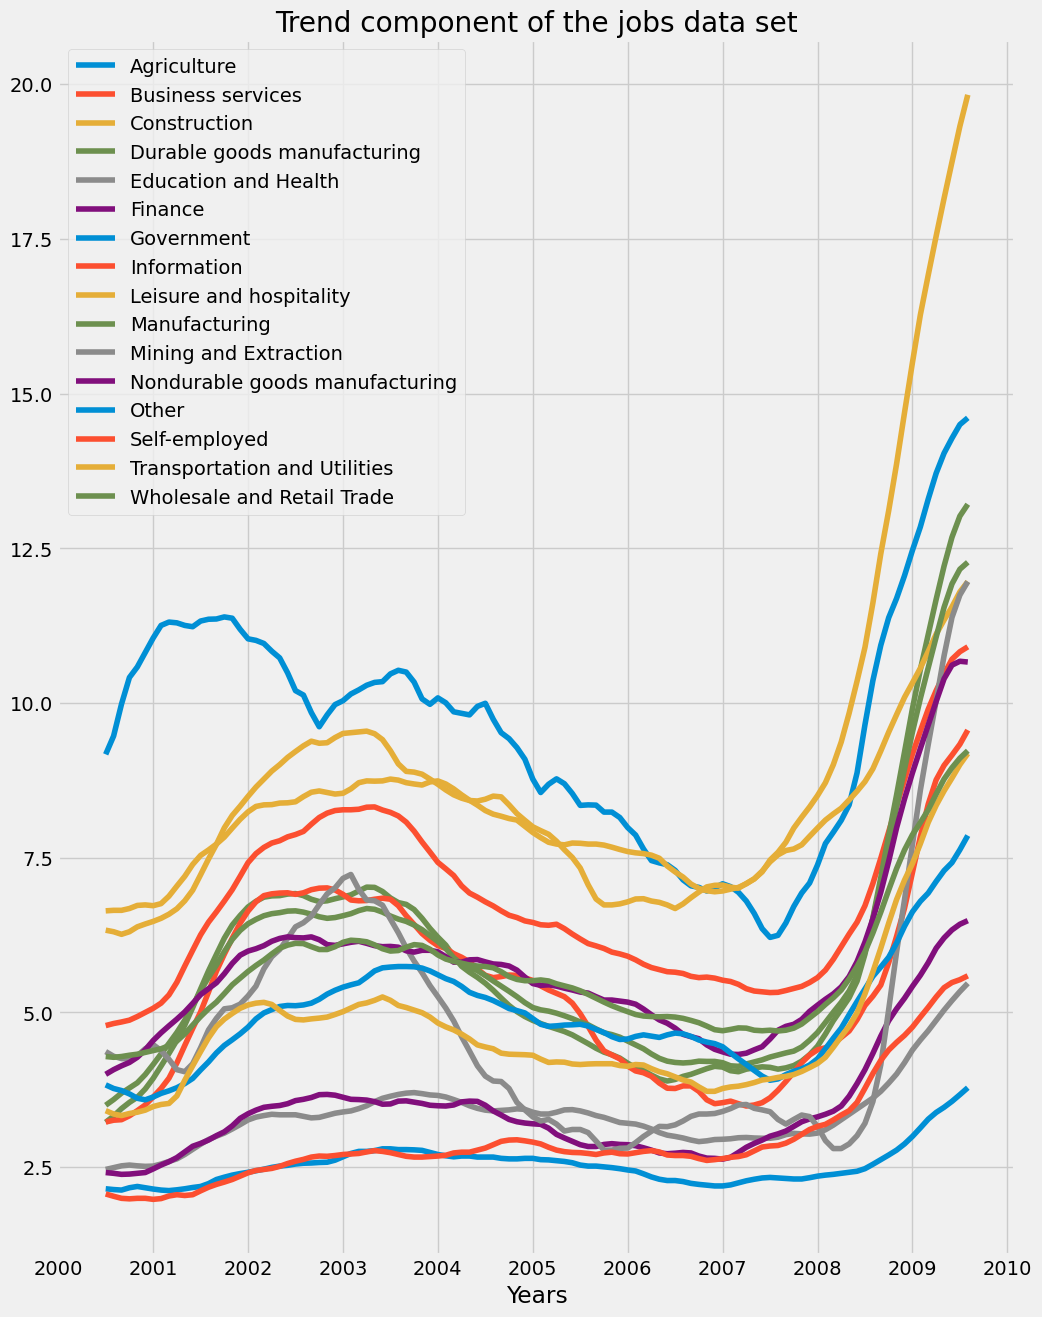

In [50]:
trend_df.plot()
plt.title('Trend component of the jobs data set')
plt.xlabel('Years')

We can see how the financial crisis of 2008 led to a rise in unemployment rates across all industries. Finally, the residual component of the jobs dataset is plotted:


Text(0.5, 0, 'Years')

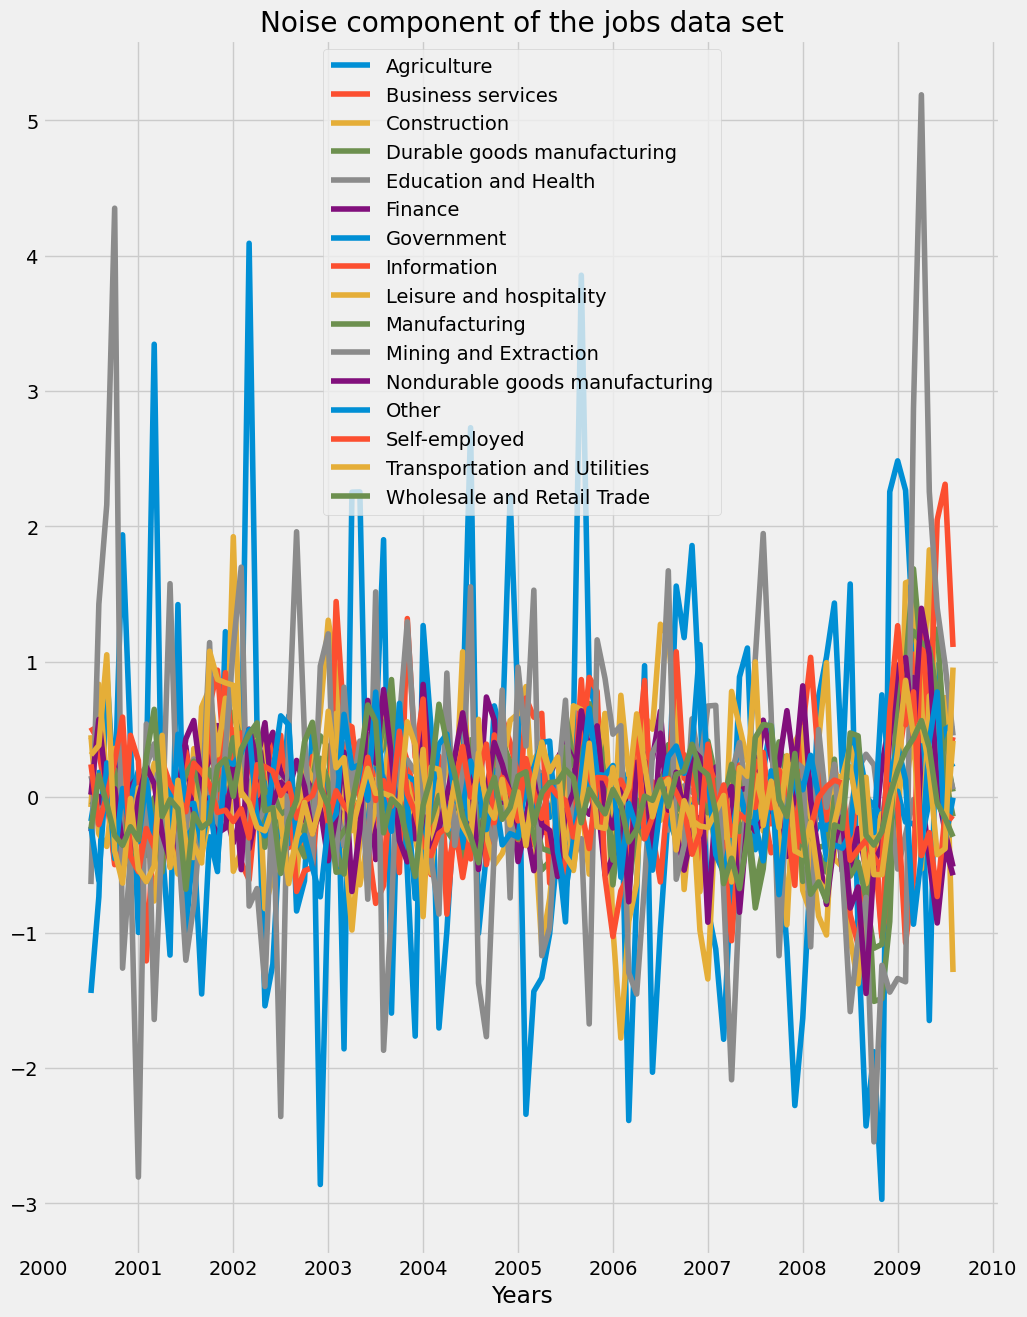

In [51]:
resid_df.plot()
plt.title('Noise component of the jobs data set')
plt.xlabel('Years')

## 5.3. Compute correlations between time series
First, compute the correlation between all columns in the trend_df DataFrame using the spearman method and assign the results to a new variable called trend_corr. Then, generate a clustermap() of the correlation matrix trend_corr by using the clustermap function from the seaborn library. Lines 3 and 4 specify a rotation angle of 0 to the y-axis labels and a rotation angle of 90 to the x-axis labels.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

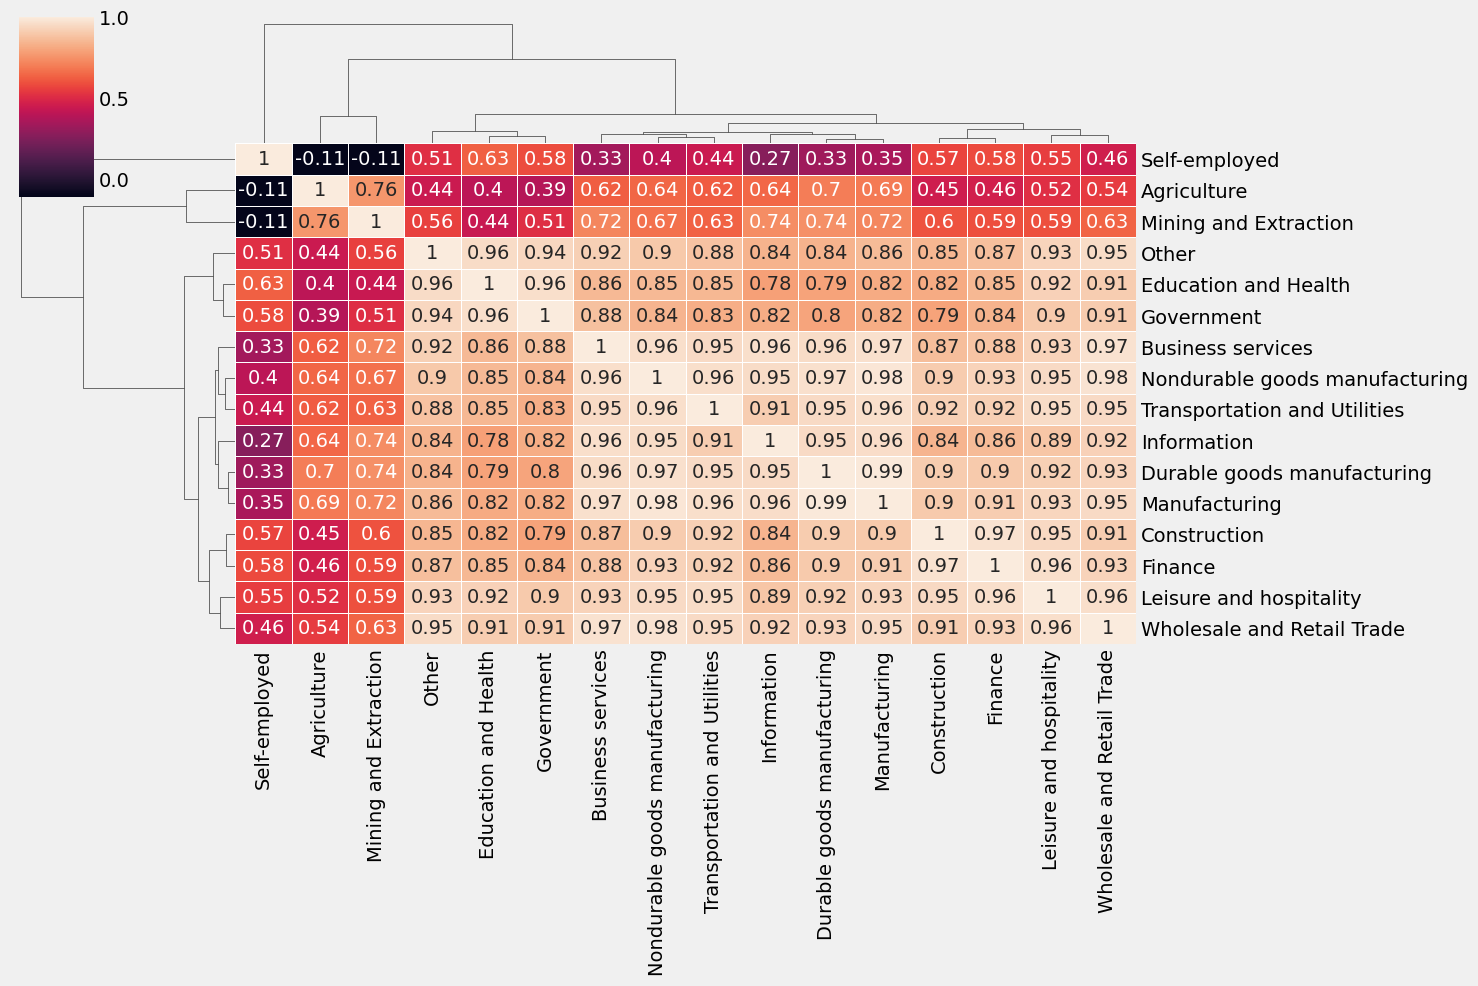

In [52]:
# Plotting a clustermap of the jobs correlation matrix

# Get correlation matrix of the seasonality_df DataFrame
trend_corr = trend_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr
fig = sns.clustermap(trend_corr, annot=True, linewidth=0.4,figsize=(15,10))

plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)